#### This notebook describes:

#### 1) How the cell type frequencies between Niches were calculated for Figure 2b and corresponding supplementary figures

#### 2) How the cell type frequencies between the spatial Visium and scRNAseq PF-ILD atlas were compared for Figure 1c

In [1]:
import scanpy as sc
import squidpy as sq
import numpy as np
import pandas as pd
import os
import sys
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import colors

#import scvi
import anndata as ad

import warnings
warnings.filterwarnings("ignore")

from collections import Counter

import ipywidgets as widgets
from ipywidgets import interact, interact_manual

plt.rcParams['figure.figsize'] = (6, 6)

from IPython.core.display import display, HTML
import random

#Define a colour map for gene expression
colors2 = plt.cm.Reds(np.linspace(0, 1, 128))
colors3 = plt.cm.Greys_r(np.linspace(0.7,0.8,20))
#colorsComb = np.vstack([colors3, colors2])
#mymap = colors.LinearSegmentedColormap.from_list('my_colormap', colorsComb)
from matplotlib import colors
colorsComb = np.vstack([plt.cm.Reds(np.linspace(0, 1, 128)), plt.cm.Greys_r(np.linspace(0.7, 0.8, 0))])
mymap = colors.LinearSegmentedColormap.from_list('my_colormap', colorsComb)

# Helper function to split list in chunks
def chunks(lista, n):
    for i in range(0, len(lista), n):
        yield lista[i:i + n]
        
        plt.rcParams['figure.figsize'] = (6, 5)
sc.set_figure_params(dpi=100, vector_friendly=True)
def mysize(w, h, d):
    fig, ax = plt.subplots(figsize = (w, h), dpi = d)
    return(fig.gca())
plt.rcParams['figure.figsize'] = (6, 5)
sc.set_figure_params(dpi=100, vector_friendly=True)
sc.settings.figdir = "./figures/"

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
import scvi

Global seed set to 0


In [3]:
## frequently used variables
from matplotlib import colors
import matplotlib.pyplot as plt
colorsComb = np.vstack([plt.cm.Reds(np.linspace(0, 1, 128)), plt.cm.Greys_r(np.linspace(0.7, 0.8, 0))])
mymap = colors.LinearSegmentedColormap.from_list('my_colormap', colorsComb)

## Along these Lines, a colourmap diverging from gray to red
gray_red = colors.LinearSegmentedColormap.from_list("grouping", ["lightgray", "red", "darkred"], N = 128)

## Some more Colour Maps
gray_violet = colors.LinearSegmentedColormap.from_list("grouping", ["lightgray", "mediumvioletred", "indigo"], N = 128)
gray_blue = colors.LinearSegmentedColormap.from_list("grouping", ["lightgray", "cornflowerblue", "darkblue"], N = 128)


def mysize(w, h, d):
    fig, ax = plt.subplots(figsize = (w, h), dpi = d)
    return(fig.gca())
#plt.rcParams['figure.figsize'] = (6, 5)
#sc.set_figure_params(dpi=120, vector_friendly=True)

In [4]:
import matplotlib.colors as colors
c_low = colors.colorConverter.to_rgba('orange', alpha = 0)
c_high = colors.colorConverter.to_rgba('red',alpha = 1)
cmap_transparent = colors.LinearSegmentedColormap.from_list('rb_cmap',[c_low, c_high], 512)

In [5]:
import matplotlib.colors as colors
c_low2 = colors.colorConverter.to_rgba('green', alpha = 0)
c_high2 = colors.colorConverter.to_rgba('darkblue',alpha = 1)
cmap_transparent2 = colors.LinearSegmentedColormap.from_list('rb_cmap',[c_low2, c_high2], 512)

In [7]:
print(f"squidpy=={sq.__version__}")
print(f"scanpy=={sc.__version__}")

squidpy==1.2.3
scanpy==1.9.3


In [11]:
import cell2location as c2l
from cell2location.utils import select_slide

In [12]:
def plot_spatial_cm(adata_vis, gene,group, vmins, vcenters, vmaxs, img_keys, cmaps, palettes):
    import matplotlib.pyplot as plt
    from cell2location.utils import select_slide
    fig, (ax1, ax2, ax3, ax4, ax5,ax6) = plt.subplots(1, 6, figsize=(26,4), )
    plt.suptitle("                                                                          control                           ", y=1.05)
    with plt.rc_context({'axes.facecolor':  'white','figure.figsize': [4, 4]}):
        slide = select_slide(adata_vis, "90_C1_RO-730_Healthy_processed_CM")
        sc.pl.spatial(slide, cmap=cmaps,color=gene,size=1.3,img_key=img_keys,vmin=vmins, use_raw=False,layer="log1p",groups=group, vmax=vmaxs, ax=ax1, show=False,vcenter= vcenters,palette=palettes, legend_loc=None)
        slide = select_slide(adata_vis, "91_A1_RO-727_Healthy_processed_CM")
        sc.pl.spatial(slide, cmap=cmaps,color=gene,size=1.3,img_key=img_keys,vmin=vmins, use_raw=False,layer="log1p",groups=group, vmax=vmaxs, ax=ax2, show=False,vcenter= vcenters,palette=palettes, legend_loc=None)
        slide = select_slide(adata_vis, "91_B1_RO-728_Healthy_processed_CM")
        sc.pl.spatial(slide, cmap=cmaps,color=gene,size=1.3,img_key=img_keys,vmin=vmins, use_raw=False,layer="log1p",groups=group, vmax=vmaxs, ax=ax3, show=False,vcenter= vcenters,palette=palettes, legend_loc=None)
        slide = select_slide(adata_vis, "1217_0002_processed_aligned")
        sc.pl.spatial(slide, cmap=cmaps,color=gene,size=1.3,img_key=img_keys,vmin=vmins, use_raw=False,layer="log1p",groups=group, vmax=vmaxs, ax=ax4, show=False,vcenter= vcenters,palette=palettes, legend_loc=None)
        slide = select_slide(adata_vis, "92_A1_RO-3203_Healthy_processed_CM")
        sc.pl.spatial(slide, cmap=cmaps,color=gene,size=1.3,img_key=img_keys,vmin=vmins, use_raw=False,layer="log1p",groups=group, vmax=vmaxs, ax=ax5, show=False,vcenter= vcenters,palette=palettes, legend_loc=None)
        slide = select_slide(adata_vis, "1217_0004_processed_aligned")
        sc.pl.spatial(slide, cmap=cmaps,color=gene,size=1.3,img_key=img_keys,vmin=vmins, use_raw=False,layer="log1p",groups=group, vmax=vmaxs, ax=ax6, show=False,vcenter= vcenters,palette=palettes, legend_loc=None)
        
    fig, (ax7, ax8, ax9, ax10, ax11,) = plt.subplots(1, 5, figsize=(22,4), )
    plt.suptitle("                                                                          IPF                           ", y=1.05)
    with plt.rc_context({'axes.facecolor':  'white','figure.figsize': [4, 4]}):
        slide = select_slide(adata_vis, "90_A1_H237762_IPF_processed_CM")
        sc.pl.spatial(slide, cmap=cmaps,color=gene,size=1.3,img_key=img_keys,vmin=vmins, use_raw=False,layer="log1p",groups=group, vmax=vmaxs, ax=ax7, show=False,vcenter= vcenters,palette=palettes, legend_loc=None)
        slide = select_slide(adata_vis, "1217_0001_processed_aligned")
        sc.pl.spatial(slide, cmap=cmaps,color=gene,size=1.3,img_key=img_keys,vmin=vmins, use_raw=False,layer="log1p",groups=group, vmax=vmaxs, ax=ax8, show=False,vcenter= vcenters,palette=palettes, legend_loc=None)
        slide = select_slide(adata_vis, "91_D1_24513-17_IPF_processed_CM")
        sc.pl.spatial(slide, cmap=cmaps,color=gene,size=1.3,img_key=img_keys,vmin=vmins, use_raw=False,layer="log1p",groups=group, vmax=vmaxs, ax=ax9, show=False,vcenter= vcenters,palette=palettes, legend_loc=None)
        slide = select_slide(adata_vis, "1217_0003_processed_aligned")
        sc.pl.spatial(slide, cmap=cmaps,color=gene,size=1.3,img_key=img_keys,vmin=vmins, use_raw=False,layer="log1p",groups=group, vmax=vmaxs, ax=ax10, show=False,vcenter= vcenters,palette=palettes, legend_loc=None)
        slide = select_slide(adata_vis, "92_D1_RO-3736_IPF_processed_CM")
        sc.pl.spatial(slide, cmap=cmaps,color=gene,size=1.3,img_key=img_keys,vmin=vmins, use_raw=False,layer="log1p",groups=group, vmax=vmaxs, ax=ax11, show=False,vcenter= vcenters,palette=palettes)
                

# load data

In [13]:
##load
adata_vis = sc.read(".h5ad")

In [14]:
adata_vis

AnnData object with n_obs × n_vars = 57787 × 12486
    obs: 'in_tissue', 'array_row', 'array_col', 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'n_counts', 'n_genes', 'leiden', 'leiden_15', 'leiden_2', 'leiden_25', 'sampleID', 'treatment', 'VisiumSlides', 'technology', '_indices', '_scvi_batch', '_scvi_labels', 'AT0', 'AT1', 'AT2', 'Aberrant basaloid', 'Adventitial fibroblast', 'Alveolar fibroblast', 'Artery', 'B/Plasma', 'Basal', 'Basophil/Mast', 'Bronchial Vessel', 'Capillary', 'Capillary Aerocyte', 'Ciliated', 'Ciliated SFTPB+/SCGB1A1+', 'Dendritic', 'Ionocyte', 'Lymphatic', 'Macrophage C1Q hi', 'Macrophage CHI3L1+/CD9 hi/', 'Macrophage FABP4+', 'Macrophage IL1B+', 'Macrophage LYVE1+', 'Macrophage RETN+/VCAN+', 'Mesothelial', 'Monocyte', 'Mucous', 'Myofibroblast', 'NK', 'Peribronchial fibroblast', 'Pericyte', 'S

In [15]:
Niche_NMF_palette = dict(zip(adata_vis.obs.Niche_NMF.cat.categories, adata_vis.uns["Niche_NMF_colors"]))

In [16]:
cts = ['AT0', 'AT1', 'AT2', 'Aberrant basaloid', 'Adventitial fibroblast', 'Alveolar fibroblast',
       'Artery', 'B/Plasma', 'Basal', 'Basophil/Mast', 'Bronchial Vessel', 'Capillary', 'Capillary Aerocyte',
       'Ciliated', 'Ciliated SFTPB+/SCGB1A1+', 'Dendritic', 'Ionocyte', 'Lymphatic', 'Macrophage C1Q hi',
       'Macrophage CHI3L1+/CD9 hi/', 'Macrophage FABP4+', 'Macrophage IL1B+', 'Macrophage LYVE1+', 
       'Macrophage RETN+/VCAN+', 'Mesothelial', 'Monocyte', 'Mucous', 'Myofibroblast', 'NK', 
       'Peribronchial fibroblast', 'Pericyte', 'Smooth Muscle', 'T cell', 'TB-SC', 'Vein', 'pDC', 'preTB-SC/RAS']

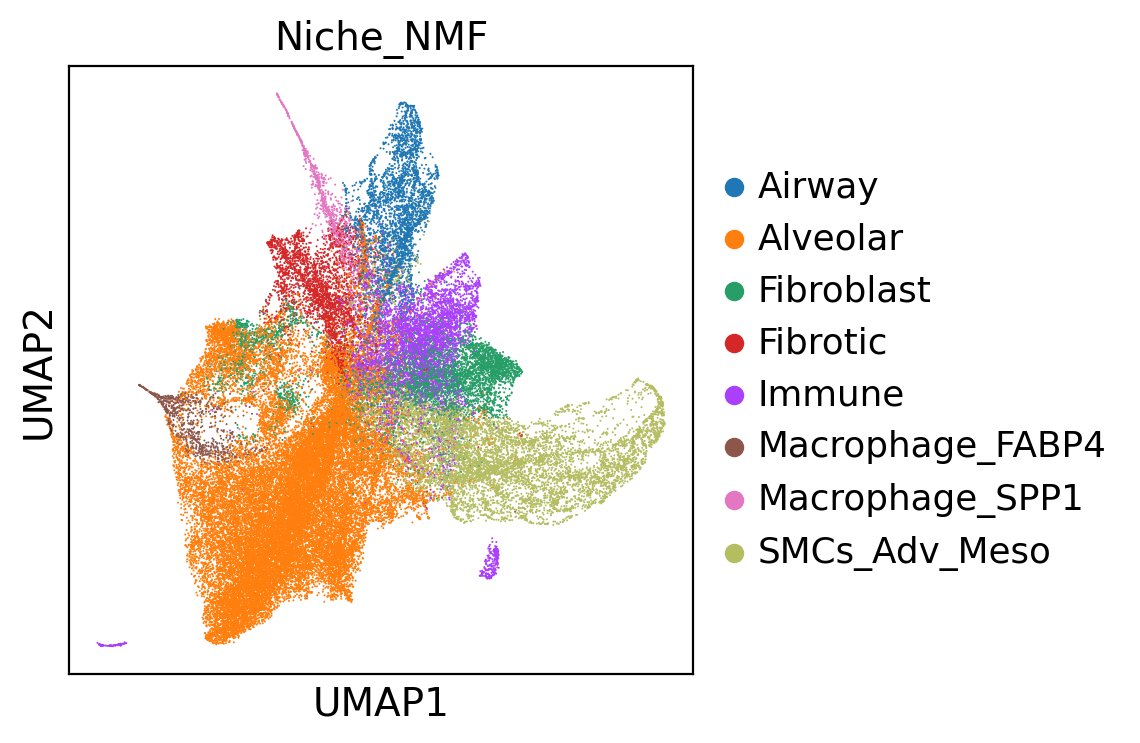

In [17]:
sc.pl.umap(adata_vis, color="Niche_NMF", palette=Niche_NMF_palette,)

## save

In [112]:
##save
#adata_vis.write(f"/data/gcbds/bib/cb_projects/TA_projects/IR/IR-aberrant-epithelial-cells-Christoph/spatial_transcriptomics/human_visium/human_10_slides_combined_c2l_analysis_11facts_annot_Niche_NMF_CM.h5ad")

# relative frequencies

### code start

In [18]:
 
def standart_lineplot(data, order, xlabel, ylabel, typ = None, gene = None, smooth = None, column = None, cols = None,
                      palette = None, width = 1, title = None, rotation = None, figsize = (15, 5), tick_size = None,
                      label_size = None,
                      order_smooth = 3, legend = None, conf_int = None, scatter = None, save = None):
    
    if smooth: 
        ## Possible to set alpha of scatter with scatter_kws={'alpha': 0.1}
        if typ:
            cat = sb.lmplot(data = data, x = xlabel, y = gene, ci = conf_int, order = order_smooth,
                            scatter = scatter, hue = typ, truncate = True, palette = cols)
        else:
            cat = sb.lmplot(data = data, x = xlabel, y = gene, ci = conf_int, order = order_smooth, scatter = scatter, 
                            palette = cols)
        
    else:
        ## Removed Parameter order = order, as order should be given numerically anyways.
        if typ:
            cat = sb.catplot(data = data, x = xlabel, y = gene, linestyles = "-", kind = "point", hue = typ,
                             palette = cols)
        else:
            cat = sb.catplot(data = data, x = xlabel, y = gene, linestyles = "-", kind = "point", palette = cols)
        if scatter:
            cat2 = sb.stripplot(data = data, x = xlabel, y = gene, palette = ["black"], hue = typ, size = 7)
            if typ:
                cat2.legend_.remove()

    cat.set(xticks = np.unique(data.loc[:, xlabel]))
    
    cat.set_xticklabels(order)
    cat.fig.set_size_inches(figsize)
        
    if rotation:
        cat.ax.set_xticklabels(order, rotation = 'vertical')
    cat.ax.set_title(title, size = label_size)
    cat.ax.set_xlabel(xlabel, size = label_size)
    cat.ax.set_ylabel(ylabel, size = label_size)
    cat.ax.tick_params(labelsize = tick_size)

    if save:
        cat.fig.savefig("%s" %save, bbox_inches = "tight")
        print("Saving figure to %s" %save)
    plt.show()
    plt.close()
    
def split_boxplot(tab, order, xlabel, ylabel, column = None, value = None, cols = None, width = 1, title = None,
                  figsize = (15, 6), legend_loc = None, jitter = None, save = None):
    fig, ax = plt.subplots()
    fig.set_size_inches(figsize)

    if cols is not None:
        fig = sb.boxplot(data = tab, hue = value, x = xlabel, y = column, order = order, width = width, palette = cols)
    else:
        fig = sb.boxplot(data = tab, hue = value, x = xlabel, y = column, order = order, width = width)
    
    if jitter is not None:
        fig = sb.swarmplot(data = tab, color = "black", x = xlabel, y = column, order = order)    
    
    if value is not None:
        plt.legend(loc = legend_loc)
    
    if title:
        fig.set_title(title, size = 15)
        
    fig.set_xlabel(xlabel, size = 15)
    fig.set_ylabel(ylabel, size = 15)
    fig.tick_params(labelsize = 12) 

    if save:
        fig.get_figure().savefig("%s" %(save))
    plt.show()
    plt.close()

In [19]:
## Relative Frequencies
def plot_relFreq(relFreqs, cluster, cols, order, xlabel = "days", condition = "batch", legend_loc = "upper right",
                 figsize = (15,6), width = .5, jitter = None, save = None):
    
    ## Subset according to order
    relFreqs = relFreqs.loc[relFreqs[xlabel].isin(order)]
    
    split_boxplot(relFreqs, order = order, xlabel = xlabel, ylabel = "relative frequency", value = condition,
                  column = cluster, cols = cols, width = width, title = cluster, figsize = figsize,
                  legend_loc = legend_loc, jitter = jitter, save = save)
    
    
## New adapted Version
def calc_relFreq(a, group_by = "cell_type", xlabel = "days", condition = "batch"):
    freqs = a.obs.groupby(["sampleID", group_by]).size()
    samples = np.unique(a.obs["sampleID"])
    ind = a.obs[group_by].cat.categories
    
    relFreqs = [freqs[ident] / sum(freqs[ident]) for ident in samples]
    relFreqs = pd.DataFrame(relFreqs, columns = ind, index = samples).fillna(0)

    #relFreqs[xlabel] = grouping.loc[samples, xlabel]  ## when using Grouping Table
    cell_types = {}
    combis = a.obs.groupby(["sampleID", xlabel]).groups.keys()

    for c in combis:
        cell_types[c[0]] = c[1]
    relFreqs[xlabel] = [cell_types[l] for l in relFreqs.index]

    ## Todo, add for condition
    if condition:
        combis = a.obs.groupby(["sampleID", condition]).groups.keys()
        for c in combis:
            cell_types[c[0]] = c[1]
        relFreqs[condition] = [cell_types[l] for l in relFreqs.index]
    
    return relFreqs

In [20]:
def plot_gene_boxplot(tab, xlabel = "cell_type", condition = None, figsize = (10, 5), legend = True,
                      palette = ["gray", "red", "blue"], score = "Axin2", size = 4, scatter = None,
                      rotate = False, width = 0.7, save = None):
    
    sb.set_style("ticks")  ## show ticks
    fig, ax = plt.subplots()
    fig.set_size_inches(figsize)

    sf = False if scatter else True
    if condition:
        fig = sb.boxplot(data = tab, x = xlabel, y = score, width = width, hue = condition,
                         showfliers = sf, palette = palette)
        if scatter:
            fig = sb.stripplot(data = tab, x = xlabel, y = score, palette = ["black"],
                               size = size, hue = condition, dodge = True)
    else:
        fig = sb.boxplot(data = tab, x = xlabel, y = score, width = width, showfliers = sf, palette = palette)
        if scatter:
            fig = sb.stripplot(data = tab, x = xlabel, y = score, palette = ["black"], size = size, dodge = True)

    if rotate:
        fig.set_xticklabels(fig.get_xticklabels(), rotation = 90)
    else:
        fig.set_xticklabels(fig.get_xticklabels())
    
    if condition:
        ## Remove the dots from the legend if scatter is used
        handles, labels = ax.get_legend_handles_labels()
        n = tab.loc[:, condition].nunique()
        plt.legend(handles[0:n], labels[0:n], bbox_to_anchor=(1.05, 1), loc = 2, borderaxespad = 0.)
    #else:
    #    ax.legend_.remove()
    
    plt.setp(ax.artists, edgecolor = "black")
    plt.setp(ax.lines, color = "black")
    sb.despine()  ## to not show ouline box

    if save:
        print("Saving to %s" %save)
        plt.savefig(save, bbox_to_anchor = "tight")
    plt.show()

In [21]:
def calc_relFreq_per_cluster(a, group_by = "cell_type", xlabel = "days", condition = None):
    freqs = a.obs.groupby([group_by, xlabel]).size()
    celltypes = np.unique(a.obs[group_by])
    ind = a.obs[xlabel].cat.categories
    
    relFreqs = [freqs[ident] / sum(freqs[ident]) for ident in celltypes]
    relFreqs = pd.DataFrame(relFreqs, columns = ind, index = celltypes).fillna(0)

    cell_types = {}
    combis = a.obs.groupby([group_by, xlabel]).groups.keys()

    for c in combis:
        cell_types[c[0]] = c[1]
    relFreqs[group_by] = relFreqs.index

    ## Todo, add for condition
    if condition:
        combis = a.obs.groupby([group_by, condition]).groups.keys()
        for c in combis:
            cell_types[c[0]] = c[1]
        relFreqs[condition] = [cell_types[l] for l in relFreqs.index]
    
    return relFreqs


In [22]:
def plot_cluster_composition(relFreqs, xlabel = "name", figsize = (6, 10), 
                             width = 0.8, order = None, errbar = None, labelsize = 15, ticksize = 13,
                             capsize = None,
                             margins = (0.02, 0.04), cols = None, save = None):
    """
    Given a relative Frequency table, plot the values as stacked barplot.
    Parameters
    ----------
    relFreqs
        Pandas DataFrame containing relative Frequencies
    figsize (default (6, 10)
        Set size of Figure in form of (width, height)
    xlabel
        Label to group by on the x-axis
    order (default None)
        Specify as List if manual ordering is desired
    width (default 0.8)
        Specify width of the Bars
    errbar (default None)
        Set to true to plot on top (only possible when grouping the frequencies)
    capsize (default None)
        Size of the horizontal lines of the errorbar
    labelsize (default 15)
        Set size of x and y asix legends
    ticksize (default 13)
        Set size of x axis ticks and legend
    save (default None)
        Set full file path in order to save Figure (e.g. /path/to/file.pdf)
    """
    import matplotlib.patches as mpatches
    
    patches = []
    fig, ax = plt.subplots()
    fig.set_size_inches(figsize)
    order = np.unique(relFreqs.loc[:, xlabel]) if order is None else order
    ci = 95 if errbar else None
    ax.margins(margins[0], margins[1])
    cell_types = np.flip([col for col in relFreqs.columns if col not in ["identifier", xlabel]])
    #cell_types = np.flip(np.setdiff1d(relFreqs.columns, ["identifier", xlabel]))
    
    bars = pd.DataFrame(index = order, data = np.zeros(len(order)))
    plot_data = pd.DataFrame(relFreqs.loc[:, xlabel])

    for i, typ in enumerate(cell_types):
        sum_up = [relFreqs.loc[:, typ].values[i] + bars.loc[g].values[0] for i, g in enumerate(relFreqs.loc[:, xlabel])]
        plot_data[typ] = sum_up
        bars.iloc[:, 0] = bars.iloc[:, 0] + relFreqs.loc[:, [typ, xlabel]].groupby(xlabel).mean().loc[order, typ]

    for i, typ in enumerate(reversed(cell_types)):
        fig = sb.barplot(data = plot_data, x = xlabel, y = typ, order = order,
                         ci = ci, errcolor = "black", color = cols[i], capsize = capsize)
        patches.append(mpatches.Patch(color = cols[i], label = typ))

    ax.set_xlabel(xlabel, size = labelsize)
    ax.set_ylabel("relative frequency", size = labelsize)
    ax.tick_params(labelsize = ticksize)
    ax.set_xticklabels(labels = order, rotation = 'vertical')
    
    ## In order to change width of bars...
    for bar in fig.patches:
        centre = bar.get_x() + bar.get_width()/2.
        bar.set_x(centre - width/2.)
        bar.set_width(width)

    plt.legend(handles = patches, loc = "center left", bbox_to_anchor=(1.02, 0.5),
               prop = {"size": ticksize}, frameon = False)
    if save:
        plt.savefig("%s" %(save))
        print("Saving Figure to %s" %save)
    plt.show()
    plt.close()

### code end

In [23]:
## Get Relative Frequencies per identifier
xlabel = "treatment"
cell_type_label = "Niche_NMF"
cols = adata_vis.uns["%s_colors" %xlabel]

relFreqs = calc_relFreq_per_cluster(adata_vis, group_by = cell_type_label, xlabel = xlabel)
relFreqs.head(4)

,Healthy,IPF,Niche_NMF
Airway,0.094907,0.905093,Airway
Alveolar,0.772162,0.227838,Alveolar
Fibroblast,0.049085,0.950915,Fibroblast
Fibrotic,0.004594,0.995406,Fibrotic


Saving Figure to ./figures/relfreq_Niches.pdf


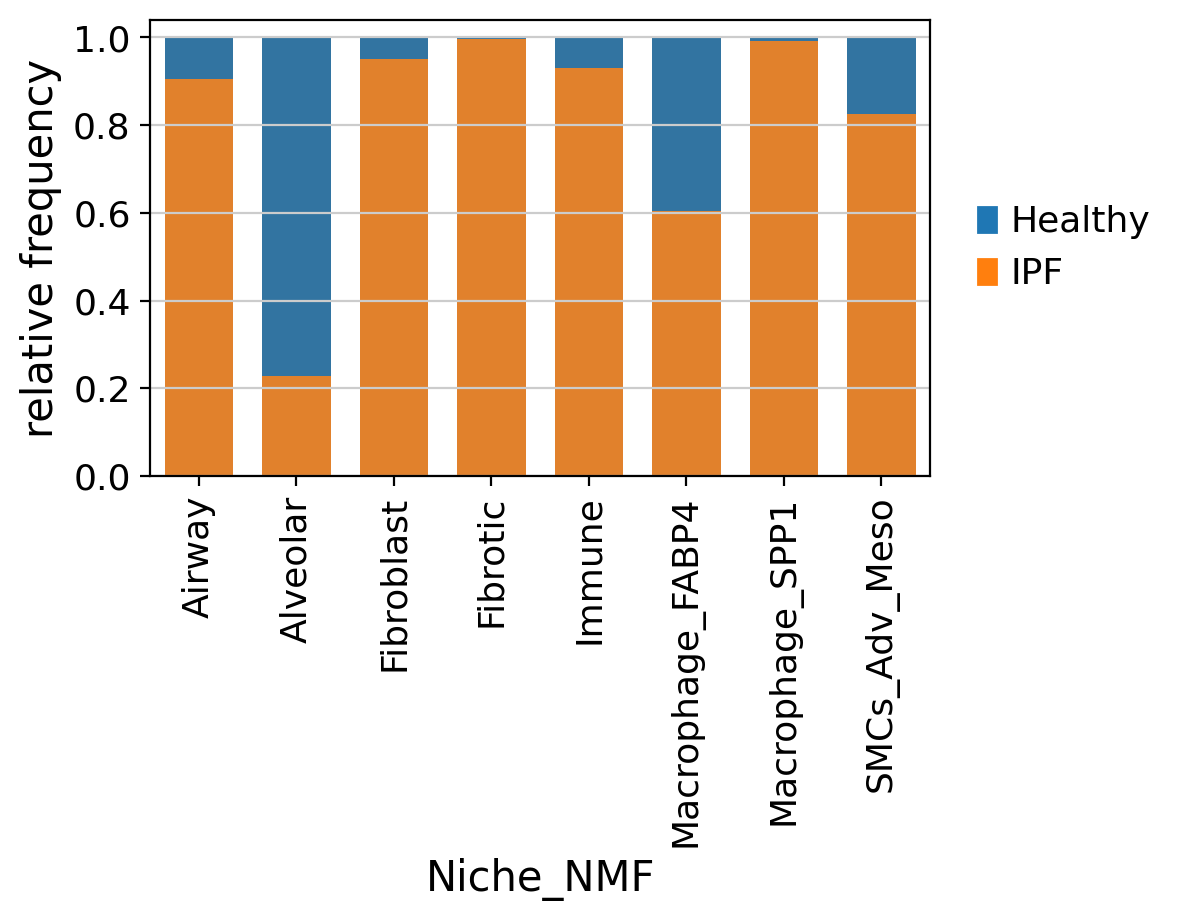

In [25]:
plot_cluster_composition(relFreqs, xlabel = cell_type_label, figsize = (5, 3), cols = cols, 
                               margins = (0.02, 0.04), width = 0.7, order = None, save = "./figures/relfreq_Niches.pdf")

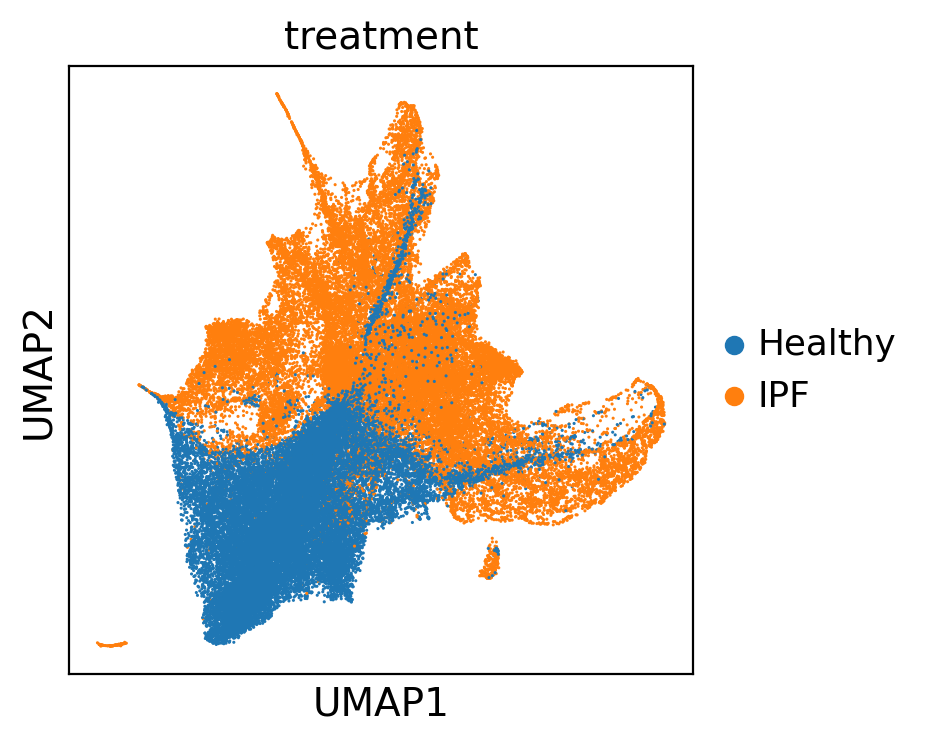

In [26]:
sc.pl.umap(adata_vis, color=["treatment",],vmax="p99",ncols=2, wspace=0.25,s=5,save = "UMAP_treatment.pdf")

In [29]:
## Get Relative Frequencies per identifier
xlabel = "treatment"
cell_type_label = "Niche_NMF"
cols = adata_vis.uns["%s_colors" %xlabel]

relFreqs = calc_relFreq_per_cluster(adata_vis, group_by = cell_type_label, xlabel = xlabel)
relFreqs.head(4)

,Healthy,IPF,Niche_NMF
Adventitial_Mesothelium,0.399734,0.600266,Adventitial_Mesothelium
Airway_Basal_Secretory,0.003795,0.996205,Airway_Basal_Secretory
Airway_Ciliated,0.119038,0.880962,Airway_Ciliated
Airway_Mucous,0.000000,1.000000,Airway_Mucous


In [30]:
# test

In [27]:
xlabel = "treatment"
cell_types_label = "Niche_NMF"
cols = adata_vis.uns["%s_colors" %cell_types_label]
celltypes = adata_vis.obs[cell_types_label].cat.categories

relFreqs = calc_relFreq(adata_vis, group_by = cell_types_label, xlabel = xlabel, condition = None)
relFreqs.head(2)

,Airway,Alveolar,Fibroblast,Fibrotic,Immune,Macrophage_FABP4,Macrophage_SPP1,SMCs_Adv_Meso,treatment
1217_0001_processed_aligned,0.026473,0.257923,0.246831,0.053318,0.074385,0.034955,0.007084,0.299031,IPF
1217_0002_processed_aligned,0.000000,0.945965,0.001623,0.000000,0.001739,0.014147,0.000232,0.036294,Healthy


Saving Figure to ./figures/relfreq_treatment.pdf


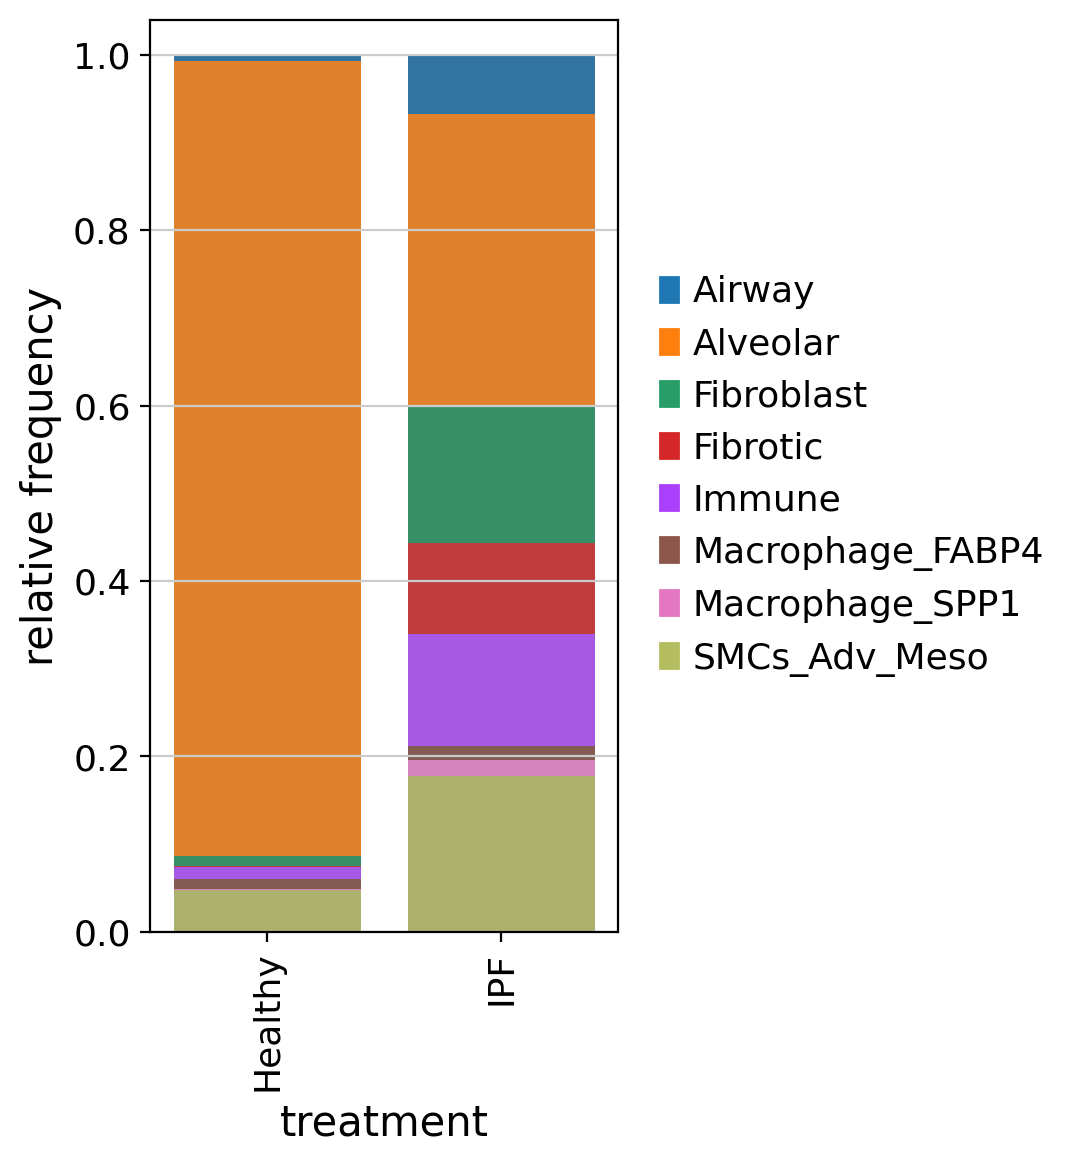

In [29]:
plot_cluster_composition(relFreqs, xlabel = xlabel, figsize = (3, 6), order = None,
                               errbar = False, cols = cols, width = 0.8,save = "./figures/relfreq_treatment.pdf")

# Compare human atlas cell type frequencies with spatial data

In [67]:
adata = sc.read("scRNAseq_atlas.h5ad")

In [68]:
adata

AnnData object with n_obs × n_vars = 206947 × 30647
    obs: 'sampleID', 'study', 'diagnosis', 'Disease_study', 'compartment', 'cell type', 'cell subtype', 'n_genes', 'log1p_n_genes_by_counts', 'total_counts', 'pct_counts_mitochondrial', 'Source', 'n_genes_by_counts', 'log1p_total_counts', 'total_counts_mitochondrial', 'log1p_total_counts_mitochondrial', 'cell_type_CM', 'cell_type_CM2'
    var: 'gene_ids', 'gene_name', 'mitochondrial', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'cell subtype_colors', 'cell type_colors', 'cell_type_CM2_colors', 'cell_type_CM_colors', 'compartment_colors', 'diagnosis_colors', 'neighbors', 'study_colors', 'umap'
    obsm: 'X_scVI', 'X_umap'
    layers: 'counts', 'log1p'
    obsp: 'connectivities', 'distances'

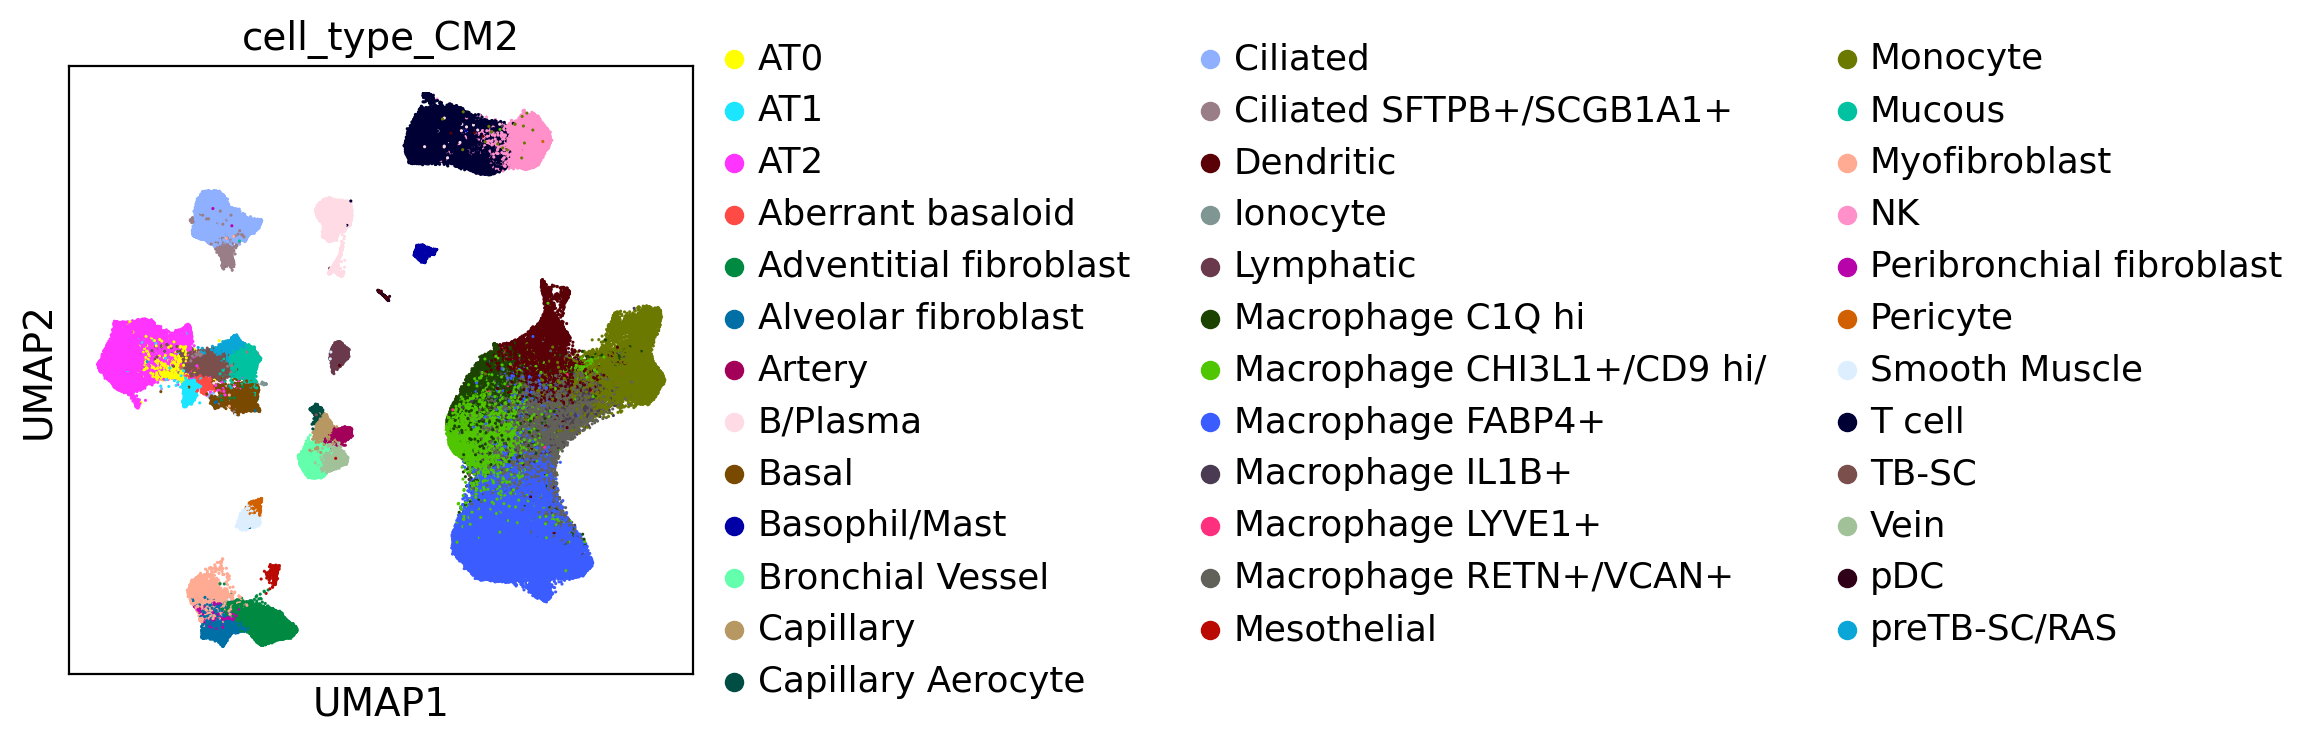

In [69]:
sc.pl.umap(adata,color = ["cell_type_CM2",],legend_loc="right margin",wspace=0.5, cmap=mymap, size=5)

In [70]:
adata.obs.cell_type_CM2.value_counts()

cell_type_CM2
Macrophage FABP4+             33948
AT2                           22383
T cell                        20100
Macrophage RETN+/VCAN+        14217
Ciliated                      11793
Monocyte                      11559
Macrophage CHI3L1+/CD9 hi/    10501
NK                             8581
Adventitial fibroblast         7899
Dendritic                      7613
Macrophage C1Q hi              6987
B/Plasma                       6874
Macrophage IL1B+               6455
Bronchial Vessel               4238
TB-SC                          3520
Alveolar fibroblast            3415
Basal                          3344
Mucous                         2612
Lymphatic                      2414
Smooth Muscle                  2010
Vein                           1905
Myofibroblast                  1825
Capillary                      1608
AT0                            1605
Artery                         1555
AT1                            1398
preTB-SC/RAS                   1209
Ciliated SFTPB

## within Niche per treatment

In [77]:
tab = sc.get.obs_df(adata_vis, keys= ["sampleID","Niche_NMF","treatment"]+ cts)

## scale cts data

In [81]:
ct_label = "cell_type"
group_by = "sampleID"
xlabel = "treatment"
ctss = cts
#cm = "sampleID"

tab = tab.loc[:, ctss + [group_by, xlabel]].copy()
tab.head()

,AT0,AT1,AT2,Aberrant basaloid,Adventitial fibroblast,Alveolar fibroblast,Artery,B/Plasma,Basal,Basophil/Mast,...,Peribronchial fibroblast,Pericyte,Smooth Muscle,T cell,TB-SC,Vein,pDC,preTB-SC/RAS,sampleID,treatment
spot_id,,,,,,,,,,,,,,,,,,,,,
90_A1_H237762_IPF_processed_CM_AAACAAGTATCTCCCA-1,0.001162,0.012275,0.000589,0.002108,0.203605,1.176494,0.027367,0.824555,0.265306,0.053716,...,0.043533,0.221838,0.147173,0.034529,0.001803,0.106638,0.008943,0.002292,90_A1_H237762_IPF_processed_CM,IPF
90_A1_H237762_IPF_processed_CM_AAACACCAATAACTGC-1,0.284728,0.797208,0.466162,0.047545,0.064358,0.038488,0.030167,0.072710,0.001503,0.004011,...,0.054350,0.763590,0.010048,0.034626,0.005220,0.010705,0.020047,0.002497,90_A1_H237762_IPF_processed_CM,IPF
90_A1_H237762_IPF_processed_CM_AAACAGCTTTCAGAAG-1,0.006953,0.053596,0.013402,0.002963,0.061115,0.068147,0.065031,0.011949,0.001548,0.008882,...,0.016156,1.338197,0.083706,0.073377,0.001867,0.006160,0.004211,0.000564,90_A1_H237762_IPF_processed_CM,IPF
90_A1_H237762_IPF_processed_CM_AAACAGGGTCTATATT-1,0.004011,0.052910,0.002612,0.035115,0.070470,0.676508,0.018409,0.302522,0.000960,0.181993,...,0.305133,0.034607,1.580754,0.189599,0.004437,0.026316,0.027901,0.007598,90_A1_H237762_IPF_processed_CM,IPF
90_A1_H237762_IPF_processed_CM_AAACATTTCCCGGATT-1,0.008899,0.018407,0.027748,0.005379,0.097108,1.371261,0.057571,0.098303,0.002723,0.206517,...,0.277523,0.087687,0.235551,0.056909,0.006370,0.043812,0.021519,0.008398,90_A1_H237762_IPF_processed_CM,IPF


In [82]:
## Calculate the mean per cell type and compartment
test_tab = tab.groupby([group_by, xlabel]).mean().reset_index()
print(test_tab.shape)
test_tab.head()

(22, 39)


,sampleID,treatment,AT0,AT1,AT2,Aberrant basaloid,Adventitial fibroblast,Alveolar fibroblast,Artery,B/Plasma,...,Myofibroblast,NK,Peribronchial fibroblast,Pericyte,Smooth Muscle,T cell,TB-SC,Vein,pDC,preTB-SC/RAS
0,90_A1_H237762_IPF_processed_CM,Healthy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,90_A1_H237762_IPF_processed_CM,IPF,0.090269,0.175795,0.117485,0.026855,0.119304,0.615580,0.101272,0.171781,...,0.227717,0.072921,0.116630,0.340423,0.396329,0.147397,0.009322,0.082544,0.022151,0.032306
2,90_C1_RO-730_Healthy_processed_CM,Healthy,0.068747,0.436316,0.086748,0.034188,0.094409,0.203766,0.085246,0.097197,...,0.018129,0.086730,0.026773,0.210429,0.182870,0.145366,0.015142,0.063378,0.037662,0.010947
3,90_C1_RO-730_Healthy_processed_CM,IPF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,91_A1_RO-727_Healthy_processed_CM,Healthy,0.173229,0.838252,0.128042,0.035071,0.039899,0.221579,0.177621,0.055203,...,0.016778,0.151242,0.037727,0.228128,0.200822,0.185240,0.024426,0.094250,0.046258,0.008446


In [83]:
test_tab = test_tab.dropna()

In [84]:
test_tab

,sampleID,treatment,AT0,AT1,AT2,Aberrant basaloid,Adventitial fibroblast,Alveolar fibroblast,Artery,B/Plasma,...,Myofibroblast,NK,Peribronchial fibroblast,Pericyte,Smooth Muscle,T cell,TB-SC,Vein,pDC,preTB-SC/RAS
1,90_A1_H237762_IPF_processed_CM,IPF,0.090269,0.175795,0.117485,0.026855,0.119304,0.615580,0.101272,0.171781,...,0.227717,0.072921,0.116630,0.340423,0.396329,0.147397,0.009322,0.082544,0.022151,0.032306
2,90_C1_RO-730_Healthy_processed_CM,Healthy,0.068747,0.436316,0.086748,0.034188,0.094409,0.203766,0.085246,0.097197,...,0.018129,0.086730,0.026773,0.210429,0.182870,0.145366,0.015142,0.063378,0.037662,0.010947
4,91_A1_RO-727_Healthy_processed_CM,Healthy,0.173229,0.838252,0.128042,0.035071,0.039899,0.221579,0.177621,0.055203,...,0.016778,0.151242,0.037727,0.228128,0.200822,0.185240,0.024426,0.094250,0.046258,0.008446
6,91_B1_RO-728_Healthy_processed_CM,Healthy,0.444485,0.632852,0.281201,0.018352,0.129530,0.140397,0.106028,0.055568,...,0.025239,0.087841,0.021969,0.150880,0.163589,0.117109,0.023300,0.062907,0.025344,0.011708
9,91_D1_24513-17_IPF_processed_CM,IPF,0.097042,0.060514,0.079937,0.052455,0.098678,0.144391,0.062627,0.280812,...,0.264894,0.054531,0.067102,0.125379,0.437738,0.177166,0.039645,0.067616,0.035509,0.018144
11,92_D1_RO-3736_IPF_processed_CM,IPF,0.132873,0.139100,0.160108,0.080715,0.067450,0.108661,0.041706,0.136339,...,0.282607,0.060300,0.023827,0.081205,0.116784,0.133512,0.027833,0.061188,0.017672,0.018290
12,92_A1_RO-3203_Healthy_processed_CM,Healthy,0.483555,0.614440,0.479979,0.029355,0.072314,0.100565,0.174297,0.068812,...,0.005493,0.121755,0.015543,0.162791,0.221393,0.177991,0.046542,0.104974,0.040992,0.050013
15,1217_0001_processed_aligned,IPF,0.162126,0.206300,0.276564,0.114052,0.391256,0.872672,0.156414,0.351898,...,0.336295,0.103769,0.143805,0.449985,1.300119,0.246494,0.056042,0.169337,0.049930,0.030123
16,1217_0002_processed_aligned,Healthy,0.266008,1.054896,0.267883,0.071106,0.034918,0.281785,0.236164,0.096142,...,0.028608,0.192525,0.056856,0.343137,0.246788,0.249630,0.054561,0.128422,0.061267,0.030568
19,1217_0003_processed_aligned,IPF,0.040788,0.031611,0.093132,0.127139,0.088966,0.286510,0.091233,0.527328,...,0.343015,0.074112,0.092156,0.125818,0.462013,0.354915,0.118937,0.096693,0.071518,0.098063


In [85]:
test_tab2 = test_tab.copy()

In [86]:
test_tab2

,sampleID,treatment,AT0,AT1,AT2,Aberrant basaloid,Adventitial fibroblast,Alveolar fibroblast,Artery,B/Plasma,...,Myofibroblast,NK,Peribronchial fibroblast,Pericyte,Smooth Muscle,T cell,TB-SC,Vein,pDC,preTB-SC/RAS
1,90_A1_H237762_IPF_processed_CM,IPF,0.090269,0.175795,0.117485,0.026855,0.119304,0.615580,0.101272,0.171781,...,0.227717,0.072921,0.116630,0.340423,0.396329,0.147397,0.009322,0.082544,0.022151,0.032306
2,90_C1_RO-730_Healthy_processed_CM,Healthy,0.068747,0.436316,0.086748,0.034188,0.094409,0.203766,0.085246,0.097197,...,0.018129,0.086730,0.026773,0.210429,0.182870,0.145366,0.015142,0.063378,0.037662,0.010947
4,91_A1_RO-727_Healthy_processed_CM,Healthy,0.173229,0.838252,0.128042,0.035071,0.039899,0.221579,0.177621,0.055203,...,0.016778,0.151242,0.037727,0.228128,0.200822,0.185240,0.024426,0.094250,0.046258,0.008446
6,91_B1_RO-728_Healthy_processed_CM,Healthy,0.444485,0.632852,0.281201,0.018352,0.129530,0.140397,0.106028,0.055568,...,0.025239,0.087841,0.021969,0.150880,0.163589,0.117109,0.023300,0.062907,0.025344,0.011708
9,91_D1_24513-17_IPF_processed_CM,IPF,0.097042,0.060514,0.079937,0.052455,0.098678,0.144391,0.062627,0.280812,...,0.264894,0.054531,0.067102,0.125379,0.437738,0.177166,0.039645,0.067616,0.035509,0.018144
11,92_D1_RO-3736_IPF_processed_CM,IPF,0.132873,0.139100,0.160108,0.080715,0.067450,0.108661,0.041706,0.136339,...,0.282607,0.060300,0.023827,0.081205,0.116784,0.133512,0.027833,0.061188,0.017672,0.018290
12,92_A1_RO-3203_Healthy_processed_CM,Healthy,0.483555,0.614440,0.479979,0.029355,0.072314,0.100565,0.174297,0.068812,...,0.005493,0.121755,0.015543,0.162791,0.221393,0.177991,0.046542,0.104974,0.040992,0.050013
15,1217_0001_processed_aligned,IPF,0.162126,0.206300,0.276564,0.114052,0.391256,0.872672,0.156414,0.351898,...,0.336295,0.103769,0.143805,0.449985,1.300119,0.246494,0.056042,0.169337,0.049930,0.030123
16,1217_0002_processed_aligned,Healthy,0.266008,1.054896,0.267883,0.071106,0.034918,0.281785,0.236164,0.096142,...,0.028608,0.192525,0.056856,0.343137,0.246788,0.249630,0.054561,0.128422,0.061267,0.030568
19,1217_0003_processed_aligned,IPF,0.040788,0.031611,0.093132,0.127139,0.088966,0.286510,0.091233,0.527328,...,0.343015,0.074112,0.092156,0.125818,0.462013,0.354915,0.118937,0.096693,0.071518,0.098063


In [87]:
test_tab2 = test_tab2.drop(["sampleID","treatment"], axis=1)

In [88]:
test_tab2

,AT0,AT1,AT2,Aberrant basaloid,Adventitial fibroblast,Alveolar fibroblast,Artery,B/Plasma,Basal,Basophil/Mast,...,Myofibroblast,NK,Peribronchial fibroblast,Pericyte,Smooth Muscle,T cell,TB-SC,Vein,pDC,preTB-SC/RAS
1,0.090269,0.175795,0.117485,0.026855,0.119304,0.615580,0.101272,0.171781,0.041559,0.048778,...,0.227717,0.072921,0.116630,0.340423,0.396329,0.147397,0.009322,0.082544,0.022151,0.032306
2,0.068747,0.436316,0.086748,0.034188,0.094409,0.203766,0.085246,0.097197,0.017536,0.046000,...,0.018129,0.086730,0.026773,0.210429,0.182870,0.145366,0.015142,0.063378,0.037662,0.010947
4,0.173229,0.838252,0.128042,0.035071,0.039899,0.221579,0.177621,0.055203,0.016575,0.043514,...,0.016778,0.151242,0.037727,0.228128,0.200822,0.185240,0.024426,0.094250,0.046258,0.008446
6,0.444485,0.632852,0.281201,0.018352,0.129530,0.140397,0.106028,0.055568,0.009134,0.046658,...,0.025239,0.087841,0.021969,0.150880,0.163589,0.117109,0.023300,0.062907,0.025344,0.011708
9,0.097042,0.060514,0.079937,0.052455,0.098678,0.144391,0.062627,0.280812,0.070314,0.037474,...,0.264894,0.054531,0.067102,0.125379,0.437738,0.177166,0.039645,0.067616,0.035509,0.018144
11,0.132873,0.139100,0.160108,0.080715,0.067450,0.108661,0.041706,0.136339,0.017207,0.024599,...,0.282607,0.060300,0.023827,0.081205,0.116784,0.133512,0.027833,0.061188,0.017672,0.018290
12,0.483555,0.614440,0.479979,0.029355,0.072314,0.100565,0.174297,0.068812,0.023533,0.060422,...,0.005493,0.121755,0.015543,0.162791,0.221393,0.177991,0.046542,0.104974,0.040992,0.050013
15,0.162126,0.206300,0.276564,0.114052,0.391256,0.872672,0.156414,0.351898,0.084332,0.102149,...,0.336295,0.103769,0.143805,0.449985,1.300119,0.246494,0.056042,0.169337,0.049930,0.030123
16,0.266008,1.054896,0.267883,0.071106,0.034918,0.281785,0.236164,0.096142,0.032422,0.070623,...,0.028608,0.192525,0.056856,0.343137,0.246788,0.249630,0.054561,0.128422,0.061267,0.030568
19,0.040788,0.031611,0.093132,0.127139,0.088966,0.286510,0.091233,0.527328,0.165478,0.091642,...,0.343015,0.074112,0.092156,0.125818,0.462013,0.354915,0.118937,0.096693,0.071518,0.098063


In [89]:
test_tab2 = test_tab2.div(test_tab2.sum(axis=1), axis=0)

In [90]:
test_tab2

,AT0,AT1,AT2,Aberrant basaloid,Adventitial fibroblast,Alveolar fibroblast,Artery,B/Plasma,Basal,Basophil/Mast,...,Myofibroblast,NK,Peribronchial fibroblast,Pericyte,Smooth Muscle,T cell,TB-SC,Vein,pDC,preTB-SC/RAS
1,0.020765,0.040439,0.027026,0.006178,0.027444,0.141605,0.023296,0.039516,0.009560,0.011221,...,0.052383,0.016775,0.026829,0.078310,0.091170,0.033907,0.002144,0.018988,0.005095,0.007432
2,0.023714,0.150507,0.029924,0.011793,0.032566,0.070289,0.029406,0.033528,0.006049,0.015868,...,0.006254,0.029917,0.009235,0.072587,0.063081,0.050144,0.005223,0.021862,0.012992,0.003776
4,0.040625,0.196585,0.030028,0.008225,0.009357,0.051964,0.041655,0.012946,0.003887,0.010205,...,0.003935,0.035469,0.008848,0.053500,0.047097,0.043442,0.005728,0.022103,0.010848,0.001981
6,0.110658,0.157553,0.070007,0.004569,0.032247,0.034953,0.026396,0.013834,0.002274,0.011616,...,0.006283,0.021869,0.005469,0.037562,0.040727,0.029155,0.005801,0.015661,0.006310,0.002915
9,0.030097,0.018768,0.024792,0.016269,0.030605,0.044783,0.019424,0.087093,0.021808,0.011623,...,0.082156,0.016913,0.020811,0.038886,0.135763,0.054948,0.012296,0.020971,0.011013,0.005627
11,0.054575,0.057133,0.065762,0.033152,0.027704,0.044631,0.017130,0.055999,0.007068,0.010104,...,0.116076,0.024767,0.009787,0.033353,0.047967,0.054838,0.011432,0.025132,0.007258,0.007512
12,0.107176,0.136185,0.106383,0.006506,0.016028,0.022289,0.038631,0.015252,0.005216,0.013392,...,0.001218,0.026986,0.003445,0.036081,0.049070,0.039450,0.010316,0.023267,0.009086,0.011085
15,0.021118,0.026872,0.036025,0.014856,0.050964,0.113673,0.020374,0.045838,0.010985,0.013306,...,0.043805,0.013517,0.018732,0.058614,0.169352,0.032108,0.007300,0.022058,0.006504,0.003924
16,0.041646,0.165153,0.041939,0.011132,0.005467,0.044116,0.036973,0.015052,0.005076,0.011057,...,0.004479,0.030141,0.008901,0.053721,0.038637,0.039082,0.008542,0.020106,0.009592,0.004786
19,0.007797,0.006043,0.017803,0.024304,0.017007,0.054770,0.017441,0.100806,0.031633,0.017519,...,0.065572,0.014168,0.017617,0.024052,0.088320,0.067847,0.022736,0.018484,0.013672,0.018746


In [91]:
test_tab

,sampleID,treatment,AT0,AT1,AT2,Aberrant basaloid,Adventitial fibroblast,Alveolar fibroblast,Artery,B/Plasma,...,Myofibroblast,NK,Peribronchial fibroblast,Pericyte,Smooth Muscle,T cell,TB-SC,Vein,pDC,preTB-SC/RAS
1,90_A1_H237762_IPF_processed_CM,IPF,0.090269,0.175795,0.117485,0.026855,0.119304,0.615580,0.101272,0.171781,...,0.227717,0.072921,0.116630,0.340423,0.396329,0.147397,0.009322,0.082544,0.022151,0.032306
2,90_C1_RO-730_Healthy_processed_CM,Healthy,0.068747,0.436316,0.086748,0.034188,0.094409,0.203766,0.085246,0.097197,...,0.018129,0.086730,0.026773,0.210429,0.182870,0.145366,0.015142,0.063378,0.037662,0.010947
4,91_A1_RO-727_Healthy_processed_CM,Healthy,0.173229,0.838252,0.128042,0.035071,0.039899,0.221579,0.177621,0.055203,...,0.016778,0.151242,0.037727,0.228128,0.200822,0.185240,0.024426,0.094250,0.046258,0.008446
6,91_B1_RO-728_Healthy_processed_CM,Healthy,0.444485,0.632852,0.281201,0.018352,0.129530,0.140397,0.106028,0.055568,...,0.025239,0.087841,0.021969,0.150880,0.163589,0.117109,0.023300,0.062907,0.025344,0.011708
9,91_D1_24513-17_IPF_processed_CM,IPF,0.097042,0.060514,0.079937,0.052455,0.098678,0.144391,0.062627,0.280812,...,0.264894,0.054531,0.067102,0.125379,0.437738,0.177166,0.039645,0.067616,0.035509,0.018144
11,92_D1_RO-3736_IPF_processed_CM,IPF,0.132873,0.139100,0.160108,0.080715,0.067450,0.108661,0.041706,0.136339,...,0.282607,0.060300,0.023827,0.081205,0.116784,0.133512,0.027833,0.061188,0.017672,0.018290
12,92_A1_RO-3203_Healthy_processed_CM,Healthy,0.483555,0.614440,0.479979,0.029355,0.072314,0.100565,0.174297,0.068812,...,0.005493,0.121755,0.015543,0.162791,0.221393,0.177991,0.046542,0.104974,0.040992,0.050013
15,1217_0001_processed_aligned,IPF,0.162126,0.206300,0.276564,0.114052,0.391256,0.872672,0.156414,0.351898,...,0.336295,0.103769,0.143805,0.449985,1.300119,0.246494,0.056042,0.169337,0.049930,0.030123
16,1217_0002_processed_aligned,Healthy,0.266008,1.054896,0.267883,0.071106,0.034918,0.281785,0.236164,0.096142,...,0.028608,0.192525,0.056856,0.343137,0.246788,0.249630,0.054561,0.128422,0.061267,0.030568
19,1217_0003_processed_aligned,IPF,0.040788,0.031611,0.093132,0.127139,0.088966,0.286510,0.091233,0.527328,...,0.343015,0.074112,0.092156,0.125818,0.462013,0.354915,0.118937,0.096693,0.071518,0.098063


In [92]:
test_tab_final = test_tab2.join(test_tab["sampleID"])

In [93]:
test_tab_final = test_tab_final.join(test_tab["treatment"])

In [94]:
test_tab_final

,AT0,AT1,AT2,Aberrant basaloid,Adventitial fibroblast,Alveolar fibroblast,Artery,B/Plasma,Basal,Basophil/Mast,...,Peribronchial fibroblast,Pericyte,Smooth Muscle,T cell,TB-SC,Vein,pDC,preTB-SC/RAS,sampleID,treatment
1,0.020765,0.040439,0.027026,0.006178,0.027444,0.141605,0.023296,0.039516,0.009560,0.011221,...,0.026829,0.078310,0.091170,0.033907,0.002144,0.018988,0.005095,0.007432,90_A1_H237762_IPF_processed_CM,IPF
2,0.023714,0.150507,0.029924,0.011793,0.032566,0.070289,0.029406,0.033528,0.006049,0.015868,...,0.009235,0.072587,0.063081,0.050144,0.005223,0.021862,0.012992,0.003776,90_C1_RO-730_Healthy_processed_CM,Healthy
4,0.040625,0.196585,0.030028,0.008225,0.009357,0.051964,0.041655,0.012946,0.003887,0.010205,...,0.008848,0.053500,0.047097,0.043442,0.005728,0.022103,0.010848,0.001981,91_A1_RO-727_Healthy_processed_CM,Healthy
6,0.110658,0.157553,0.070007,0.004569,0.032247,0.034953,0.026396,0.013834,0.002274,0.011616,...,0.005469,0.037562,0.040727,0.029155,0.005801,0.015661,0.006310,0.002915,91_B1_RO-728_Healthy_processed_CM,Healthy
9,0.030097,0.018768,0.024792,0.016269,0.030605,0.044783,0.019424,0.087093,0.021808,0.011623,...,0.020811,0.038886,0.135763,0.054948,0.012296,0.020971,0.011013,0.005627,91_D1_24513-17_IPF_processed_CM,IPF
11,0.054575,0.057133,0.065762,0.033152,0.027704,0.044631,0.017130,0.055999,0.007068,0.010104,...,0.009787,0.033353,0.047967,0.054838,0.011432,0.025132,0.007258,0.007512,92_D1_RO-3736_IPF_processed_CM,IPF
12,0.107176,0.136185,0.106383,0.006506,0.016028,0.022289,0.038631,0.015252,0.005216,0.013392,...,0.003445,0.036081,0.049070,0.039450,0.010316,0.023267,0.009086,0.011085,92_A1_RO-3203_Healthy_processed_CM,Healthy
15,0.021118,0.026872,0.036025,0.014856,0.050964,0.113673,0.020374,0.045838,0.010985,0.013306,...,0.018732,0.058614,0.169352,0.032108,0.007300,0.022058,0.006504,0.003924,1217_0001_processed_aligned,IPF
16,0.041646,0.165153,0.041939,0.011132,0.005467,0.044116,0.036973,0.015052,0.005076,0.011057,...,0.008901,0.053721,0.038637,0.039082,0.008542,0.020106,0.009592,0.004786,1217_0002_processed_aligned,Healthy
19,0.007797,0.006043,0.017803,0.024304,0.017007,0.054770,0.017441,0.100806,0.031633,0.017519,...,0.017617,0.024052,0.088320,0.067847,0.022736,0.018484,0.013672,0.018746,1217_0003_processed_aligned,IPF


In [95]:
test_tab_final["identifier"] = test_tab_final["treatment"].astype(str) + "_spatial"

In [96]:
test_tab_final

,AT0,AT1,AT2,Aberrant basaloid,Adventitial fibroblast,Alveolar fibroblast,Artery,B/Plasma,Basal,Basophil/Mast,...,Pericyte,Smooth Muscle,T cell,TB-SC,Vein,pDC,preTB-SC/RAS,sampleID,treatment,identifier
1,0.020765,0.040439,0.027026,0.006178,0.027444,0.141605,0.023296,0.039516,0.009560,0.011221,...,0.078310,0.091170,0.033907,0.002144,0.018988,0.005095,0.007432,90_A1_H237762_IPF_processed_CM,IPF,IPF_spatial
2,0.023714,0.150507,0.029924,0.011793,0.032566,0.070289,0.029406,0.033528,0.006049,0.015868,...,0.072587,0.063081,0.050144,0.005223,0.021862,0.012992,0.003776,90_C1_RO-730_Healthy_processed_CM,Healthy,Healthy_spatial
4,0.040625,0.196585,0.030028,0.008225,0.009357,0.051964,0.041655,0.012946,0.003887,0.010205,...,0.053500,0.047097,0.043442,0.005728,0.022103,0.010848,0.001981,91_A1_RO-727_Healthy_processed_CM,Healthy,Healthy_spatial
6,0.110658,0.157553,0.070007,0.004569,0.032247,0.034953,0.026396,0.013834,0.002274,0.011616,...,0.037562,0.040727,0.029155,0.005801,0.015661,0.006310,0.002915,91_B1_RO-728_Healthy_processed_CM,Healthy,Healthy_spatial
9,0.030097,0.018768,0.024792,0.016269,0.030605,0.044783,0.019424,0.087093,0.021808,0.011623,...,0.038886,0.135763,0.054948,0.012296,0.020971,0.011013,0.005627,91_D1_24513-17_IPF_processed_CM,IPF,IPF_spatial
11,0.054575,0.057133,0.065762,0.033152,0.027704,0.044631,0.017130,0.055999,0.007068,0.010104,...,0.033353,0.047967,0.054838,0.011432,0.025132,0.007258,0.007512,92_D1_RO-3736_IPF_processed_CM,IPF,IPF_spatial
12,0.107176,0.136185,0.106383,0.006506,0.016028,0.022289,0.038631,0.015252,0.005216,0.013392,...,0.036081,0.049070,0.039450,0.010316,0.023267,0.009086,0.011085,92_A1_RO-3203_Healthy_processed_CM,Healthy,Healthy_spatial
15,0.021118,0.026872,0.036025,0.014856,0.050964,0.113673,0.020374,0.045838,0.010985,0.013306,...,0.058614,0.169352,0.032108,0.007300,0.022058,0.006504,0.003924,1217_0001_processed_aligned,IPF,IPF_spatial
16,0.041646,0.165153,0.041939,0.011132,0.005467,0.044116,0.036973,0.015052,0.005076,0.011057,...,0.053721,0.038637,0.039082,0.008542,0.020106,0.009592,0.004786,1217_0002_processed_aligned,Healthy,Healthy_spatial
19,0.007797,0.006043,0.017803,0.024304,0.017007,0.054770,0.017441,0.100806,0.031633,0.017519,...,0.024052,0.088320,0.067847,0.022736,0.018484,0.013672,0.018746,1217_0003_processed_aligned,IPF,IPF_spatial


In [97]:
## relFreqs table from adata atlas

In [98]:
relFreqs

,AT0,AT1,AT2,Aberrant basaloid,Adventitial fibroblast,Alveolar fibroblast,Artery,B/Plasma,Basal,Basophil/Mast,...,NK,Peribronchial fibroblast,Pericyte,Smooth Muscle,T cell,TB-SC,Vein,pDC,preTB-SC/RAS,diagnosis
Cryobiopsy,0.022556,0.072682,0.038429,0.005013,0.016708,0.038429,0.071011,0.005013,0.000835,0.066834,...,0.059315,0.000000,0.000000,0.030911,0.155388,0.034252,0.078530,0.002506,0.000835,IPF
Donor1,0.003160,0.004573,0.264926,0.000083,0.180526,0.082987,0.000083,0.079079,0.072593,0.000166,...,0.000249,0.001414,0.015051,0.032014,0.011143,0.001663,0.000000,0.001580,0.015965,Control
Donor_01,0.024938,0.001247,0.548628,0.000416,0.000000,0.000000,0.000000,0.000000,0.000000,0.000416,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.004156,0.000000,0.000000,0.002909,Control
Donor_02,0.021322,0.059701,0.300640,0.006397,0.000000,0.000000,0.000000,0.000000,0.010661,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.010661,0.000000,0.000000,0.023454,Control
Donor_03,0.022727,0.005909,0.474091,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000455,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.031818,0.000000,0.000000,0.001364,Control
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VUILD61,0.006289,0.003870,0.154814,0.009192,0.008224,0.012095,0.007257,0.003387,0.028060,0.000968,...,0.004354,0.001935,0.000484,0.003870,0.030963,0.039671,0.010160,0.006289,0.019836,IPF
VUILD62,0.004314,0.013902,0.074305,0.006232,0.005273,0.003835,0.009108,0.014861,0.006711,0.000959,...,0.035954,0.000959,0.002876,0.006711,0.100192,0.012464,0.015820,0.003835,0.017258,IPF
VUILD63,0.003876,0.003876,0.067829,0.001938,0.000000,0.000000,0.000000,0.001938,0.009690,0.001938,...,0.007752,0.000000,0.000000,0.000000,0.065891,0.021318,0.000000,0.000000,0.013566,IPF
VUILD64,0.007821,0.011173,0.061453,0.005587,0.004469,0.013408,0.025698,0.006704,0.017877,0.016760,...,0.005587,0.001117,0.001117,0.010056,0.053631,0.018994,0.036872,0.003352,0.003352,IPF


In [99]:
relFreqs["sampleID"] = relFreqs.index

In [100]:
relFreqs["treatment"] = relFreqs["diagnosis"]

In [101]:
relFreqs["identifier"] = relFreqs["diagnosis"].astype(str) + "_atlas"

In [102]:
relFreqs

,AT0,AT1,AT2,Aberrant basaloid,Adventitial fibroblast,Alveolar fibroblast,Artery,B/Plasma,Basal,Basophil/Mast,...,Smooth Muscle,T cell,TB-SC,Vein,pDC,preTB-SC/RAS,diagnosis,sampleID,treatment,identifier
Cryobiopsy,0.022556,0.072682,0.038429,0.005013,0.016708,0.038429,0.071011,0.005013,0.000835,0.066834,...,0.030911,0.155388,0.034252,0.078530,0.002506,0.000835,IPF,Cryobiopsy,IPF,IPF_atlas
Donor1,0.003160,0.004573,0.264926,0.000083,0.180526,0.082987,0.000083,0.079079,0.072593,0.000166,...,0.032014,0.011143,0.001663,0.000000,0.001580,0.015965,Control,Donor1,Control,Control_atlas
Donor_01,0.024938,0.001247,0.548628,0.000416,0.000000,0.000000,0.000000,0.000000,0.000000,0.000416,...,0.000000,0.000000,0.004156,0.000000,0.000000,0.002909,Control,Donor_01,Control,Control_atlas
Donor_02,0.021322,0.059701,0.300640,0.006397,0.000000,0.000000,0.000000,0.000000,0.010661,0.000000,...,0.000000,0.000000,0.010661,0.000000,0.000000,0.023454,Control,Donor_02,Control,Control_atlas
Donor_03,0.022727,0.005909,0.474091,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000455,...,0.000000,0.000000,0.031818,0.000000,0.000000,0.001364,Control,Donor_03,Control,Control_atlas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VUILD61,0.006289,0.003870,0.154814,0.009192,0.008224,0.012095,0.007257,0.003387,0.028060,0.000968,...,0.003870,0.030963,0.039671,0.010160,0.006289,0.019836,IPF,VUILD61,IPF,IPF_atlas
VUILD62,0.004314,0.013902,0.074305,0.006232,0.005273,0.003835,0.009108,0.014861,0.006711,0.000959,...,0.006711,0.100192,0.012464,0.015820,0.003835,0.017258,IPF,VUILD62,IPF,IPF_atlas
VUILD63,0.003876,0.003876,0.067829,0.001938,0.000000,0.000000,0.000000,0.001938,0.009690,0.001938,...,0.000000,0.065891,0.021318,0.000000,0.000000,0.013566,IPF,VUILD63,IPF,IPF_atlas
VUILD64,0.007821,0.011173,0.061453,0.005587,0.004469,0.013408,0.025698,0.006704,0.017877,0.016760,...,0.010056,0.053631,0.018994,0.036872,0.003352,0.003352,IPF,VUILD64,IPF,IPF_atlas


In [103]:
relFreqs2 =  relFreqs.drop(["diagnosis"], axis=1)

In [104]:
relFreqs2.reset_index(drop=True, inplace=True)

In [105]:
relFreqs2

,AT0,AT1,AT2,Aberrant basaloid,Adventitial fibroblast,Alveolar fibroblast,Artery,B/Plasma,Basal,Basophil/Mast,...,Pericyte,Smooth Muscle,T cell,TB-SC,Vein,pDC,preTB-SC/RAS,sampleID,treatment,identifier
0,0.022556,0.072682,0.038429,0.005013,0.016708,0.038429,0.071011,0.005013,0.000835,0.066834,...,0.000000,0.030911,0.155388,0.034252,0.078530,0.002506,0.000835,Cryobiopsy,IPF,IPF_atlas
1,0.003160,0.004573,0.264926,0.000083,0.180526,0.082987,0.000083,0.079079,0.072593,0.000166,...,0.015051,0.032014,0.011143,0.001663,0.000000,0.001580,0.015965,Donor1,Control,Control_atlas
2,0.024938,0.001247,0.548628,0.000416,0.000000,0.000000,0.000000,0.000000,0.000000,0.000416,...,0.000000,0.000000,0.000000,0.004156,0.000000,0.000000,0.002909,Donor_01,Control,Control_atlas
3,0.021322,0.059701,0.300640,0.006397,0.000000,0.000000,0.000000,0.000000,0.010661,0.000000,...,0.000000,0.000000,0.000000,0.010661,0.000000,0.000000,0.023454,Donor_02,Control,Control_atlas
4,0.022727,0.005909,0.474091,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000455,...,0.000000,0.000000,0.000000,0.031818,0.000000,0.000000,0.001364,Donor_03,Control,Control_atlas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,0.006289,0.003870,0.154814,0.009192,0.008224,0.012095,0.007257,0.003387,0.028060,0.000968,...,0.000484,0.003870,0.030963,0.039671,0.010160,0.006289,0.019836,VUILD61,IPF,IPF_atlas
118,0.004314,0.013902,0.074305,0.006232,0.005273,0.003835,0.009108,0.014861,0.006711,0.000959,...,0.002876,0.006711,0.100192,0.012464,0.015820,0.003835,0.017258,VUILD62,IPF,IPF_atlas
119,0.003876,0.003876,0.067829,0.001938,0.000000,0.000000,0.000000,0.001938,0.009690,0.001938,...,0.000000,0.000000,0.065891,0.021318,0.000000,0.000000,0.013566,VUILD63,IPF,IPF_atlas
120,0.007821,0.011173,0.061453,0.005587,0.004469,0.013408,0.025698,0.006704,0.017877,0.016760,...,0.001117,0.010056,0.053631,0.018994,0.036872,0.003352,0.003352,VUILD64,IPF,IPF_atlas


In [106]:
combined = pd.concat([test_tab_final, relFreqs2], axis = 0)
combined

,AT0,AT1,AT2,Aberrant basaloid,Adventitial fibroblast,Alveolar fibroblast,Artery,B/Plasma,Basal,Basophil/Mast,...,Pericyte,Smooth Muscle,T cell,TB-SC,Vein,pDC,preTB-SC/RAS,sampleID,treatment,identifier
1,0.020765,0.040439,0.027026,0.006178,0.027444,0.141605,0.023296,0.039516,0.009560,0.011221,...,0.078310,0.091170,0.033907,0.002144,0.018988,0.005095,0.007432,90_A1_H237762_IPF_processed_CM,IPF,IPF_spatial
2,0.023714,0.150507,0.029924,0.011793,0.032566,0.070289,0.029406,0.033528,0.006049,0.015868,...,0.072587,0.063081,0.050144,0.005223,0.021862,0.012992,0.003776,90_C1_RO-730_Healthy_processed_CM,Healthy,Healthy_spatial
4,0.040625,0.196585,0.030028,0.008225,0.009357,0.051964,0.041655,0.012946,0.003887,0.010205,...,0.053500,0.047097,0.043442,0.005728,0.022103,0.010848,0.001981,91_A1_RO-727_Healthy_processed_CM,Healthy,Healthy_spatial
6,0.110658,0.157553,0.070007,0.004569,0.032247,0.034953,0.026396,0.013834,0.002274,0.011616,...,0.037562,0.040727,0.029155,0.005801,0.015661,0.006310,0.002915,91_B1_RO-728_Healthy_processed_CM,Healthy,Healthy_spatial
9,0.030097,0.018768,0.024792,0.016269,0.030605,0.044783,0.019424,0.087093,0.021808,0.011623,...,0.038886,0.135763,0.054948,0.012296,0.020971,0.011013,0.005627,91_D1_24513-17_IPF_processed_CM,IPF,IPF_spatial
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,0.006289,0.003870,0.154814,0.009192,0.008224,0.012095,0.007257,0.003387,0.028060,0.000968,...,0.000484,0.003870,0.030963,0.039671,0.010160,0.006289,0.019836,VUILD61,IPF,IPF_atlas
118,0.004314,0.013902,0.074305,0.006232,0.005273,0.003835,0.009108,0.014861,0.006711,0.000959,...,0.002876,0.006711,0.100192,0.012464,0.015820,0.003835,0.017258,VUILD62,IPF,IPF_atlas
119,0.003876,0.003876,0.067829,0.001938,0.000000,0.000000,0.000000,0.001938,0.009690,0.001938,...,0.000000,0.000000,0.065891,0.021318,0.000000,0.000000,0.013566,VUILD63,IPF,IPF_atlas
120,0.007821,0.011173,0.061453,0.005587,0.004469,0.013408,0.025698,0.006704,0.017877,0.016760,...,0.001117,0.010056,0.053631,0.018994,0.036872,0.003352,0.003352,VUILD64,IPF,IPF_atlas


In [107]:
combined = combined.drop(["Ionocyte"], axis=1)

In [108]:
combined = combined.drop(["treatment"], axis=1)

In [109]:
combined

,AT0,AT1,AT2,Aberrant basaloid,Adventitial fibroblast,Alveolar fibroblast,Artery,B/Plasma,Basal,Basophil/Mast,...,Peribronchial fibroblast,Pericyte,Smooth Muscle,T cell,TB-SC,Vein,pDC,preTB-SC/RAS,sampleID,identifier
1,0.020765,0.040439,0.027026,0.006178,0.027444,0.141605,0.023296,0.039516,0.009560,0.011221,...,0.026829,0.078310,0.091170,0.033907,0.002144,0.018988,0.005095,0.007432,90_A1_H237762_IPF_processed_CM,IPF_spatial
2,0.023714,0.150507,0.029924,0.011793,0.032566,0.070289,0.029406,0.033528,0.006049,0.015868,...,0.009235,0.072587,0.063081,0.050144,0.005223,0.021862,0.012992,0.003776,90_C1_RO-730_Healthy_processed_CM,Healthy_spatial
4,0.040625,0.196585,0.030028,0.008225,0.009357,0.051964,0.041655,0.012946,0.003887,0.010205,...,0.008848,0.053500,0.047097,0.043442,0.005728,0.022103,0.010848,0.001981,91_A1_RO-727_Healthy_processed_CM,Healthy_spatial
6,0.110658,0.157553,0.070007,0.004569,0.032247,0.034953,0.026396,0.013834,0.002274,0.011616,...,0.005469,0.037562,0.040727,0.029155,0.005801,0.015661,0.006310,0.002915,91_B1_RO-728_Healthy_processed_CM,Healthy_spatial
9,0.030097,0.018768,0.024792,0.016269,0.030605,0.044783,0.019424,0.087093,0.021808,0.011623,...,0.020811,0.038886,0.135763,0.054948,0.012296,0.020971,0.011013,0.005627,91_D1_24513-17_IPF_processed_CM,IPF_spatial
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,0.006289,0.003870,0.154814,0.009192,0.008224,0.012095,0.007257,0.003387,0.028060,0.000968,...,0.001935,0.000484,0.003870,0.030963,0.039671,0.010160,0.006289,0.019836,VUILD61,IPF_atlas
118,0.004314,0.013902,0.074305,0.006232,0.005273,0.003835,0.009108,0.014861,0.006711,0.000959,...,0.000959,0.002876,0.006711,0.100192,0.012464,0.015820,0.003835,0.017258,VUILD62,IPF_atlas
119,0.003876,0.003876,0.067829,0.001938,0.000000,0.000000,0.000000,0.001938,0.009690,0.001938,...,0.000000,0.000000,0.000000,0.065891,0.021318,0.000000,0.000000,0.013566,VUILD63,IPF_atlas
120,0.007821,0.011173,0.061453,0.005587,0.004469,0.013408,0.025698,0.006704,0.017877,0.016760,...,0.001117,0.001117,0.010056,0.053631,0.018994,0.036872,0.003352,0.003352,VUILD64,IPF_atlas


In [114]:
ct_label = "cell_type"
group_by = "sampleID"
xlabel = "identifier"
ctss = cts
cm = "sampleID"

In [115]:
## in order to plot all cell types, melt the data frame
tab_bleo = pd.melt(combined, id_vars = [group_by, xlabel] , var_name = ct_label)
print(tab_bleo.shape)
tab_bleo.head()

(4788, 4)


,sampleID,identifier,cell_type,value
0,90_A1_H237762_IPF_processed_CM,IPF_spatial,AT0,0.020765
1,90_C1_RO-730_Healthy_processed_CM,Healthy_spatial,AT0,0.023714
2,91_A1_RO-727_Healthy_processed_CM,Healthy_spatial,AT0,0.040625
3,91_B1_RO-728_Healthy_processed_CM,Healthy_spatial,AT0,0.110658
4,91_D1_24513-17_IPF_processed_CM,IPF_spatial,AT0,0.030097


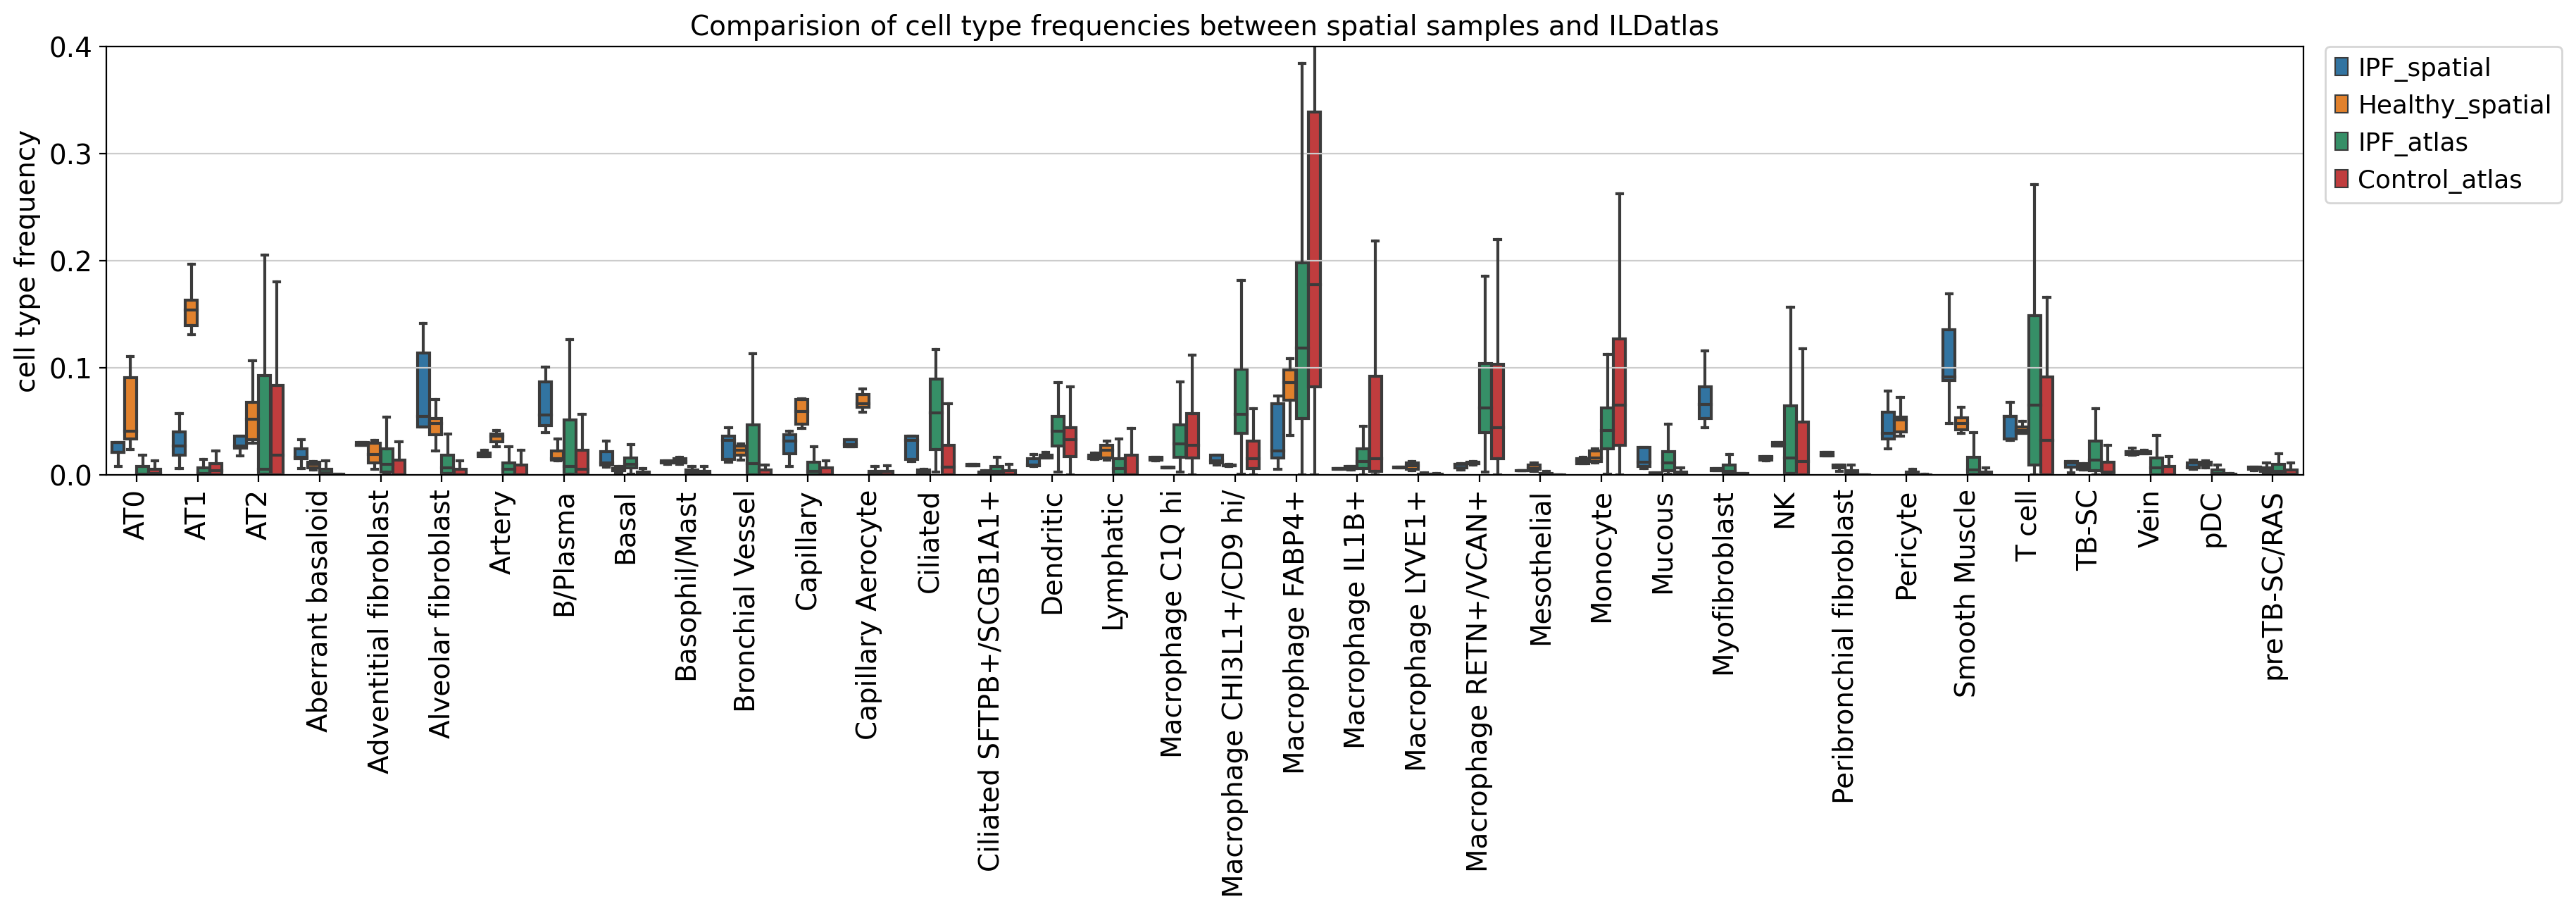

In [116]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 4)
#order = ["Alveolar_AT1",]# "Alveolar_AT2", "Alveolar_Macrophage", "Fibrotic",]

fig = sb.boxplot(data = tab_bleo, hue = "identifier", x = "cell_type", y = "value", order = None,showfliers=False) #hue_order = ["AT1", "AT2", "Macrophage FABP4+", "Myofibroblast","Macrophage"])
fig.legend(bbox_to_anchor= (1.01, 1), loc='upper left', borderaxespad=0)
plt.xlabel("")
plt.ylim(0,0.4)
plt.ylabel("cell type frequency")
plt.title("Comparision of cell type frequencies between spatial samples and ILDatlas")
fig.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.savefig('./figures/Comparision_celltypefrequencies_atlas_spatial_cut.pdf')
plt.show()

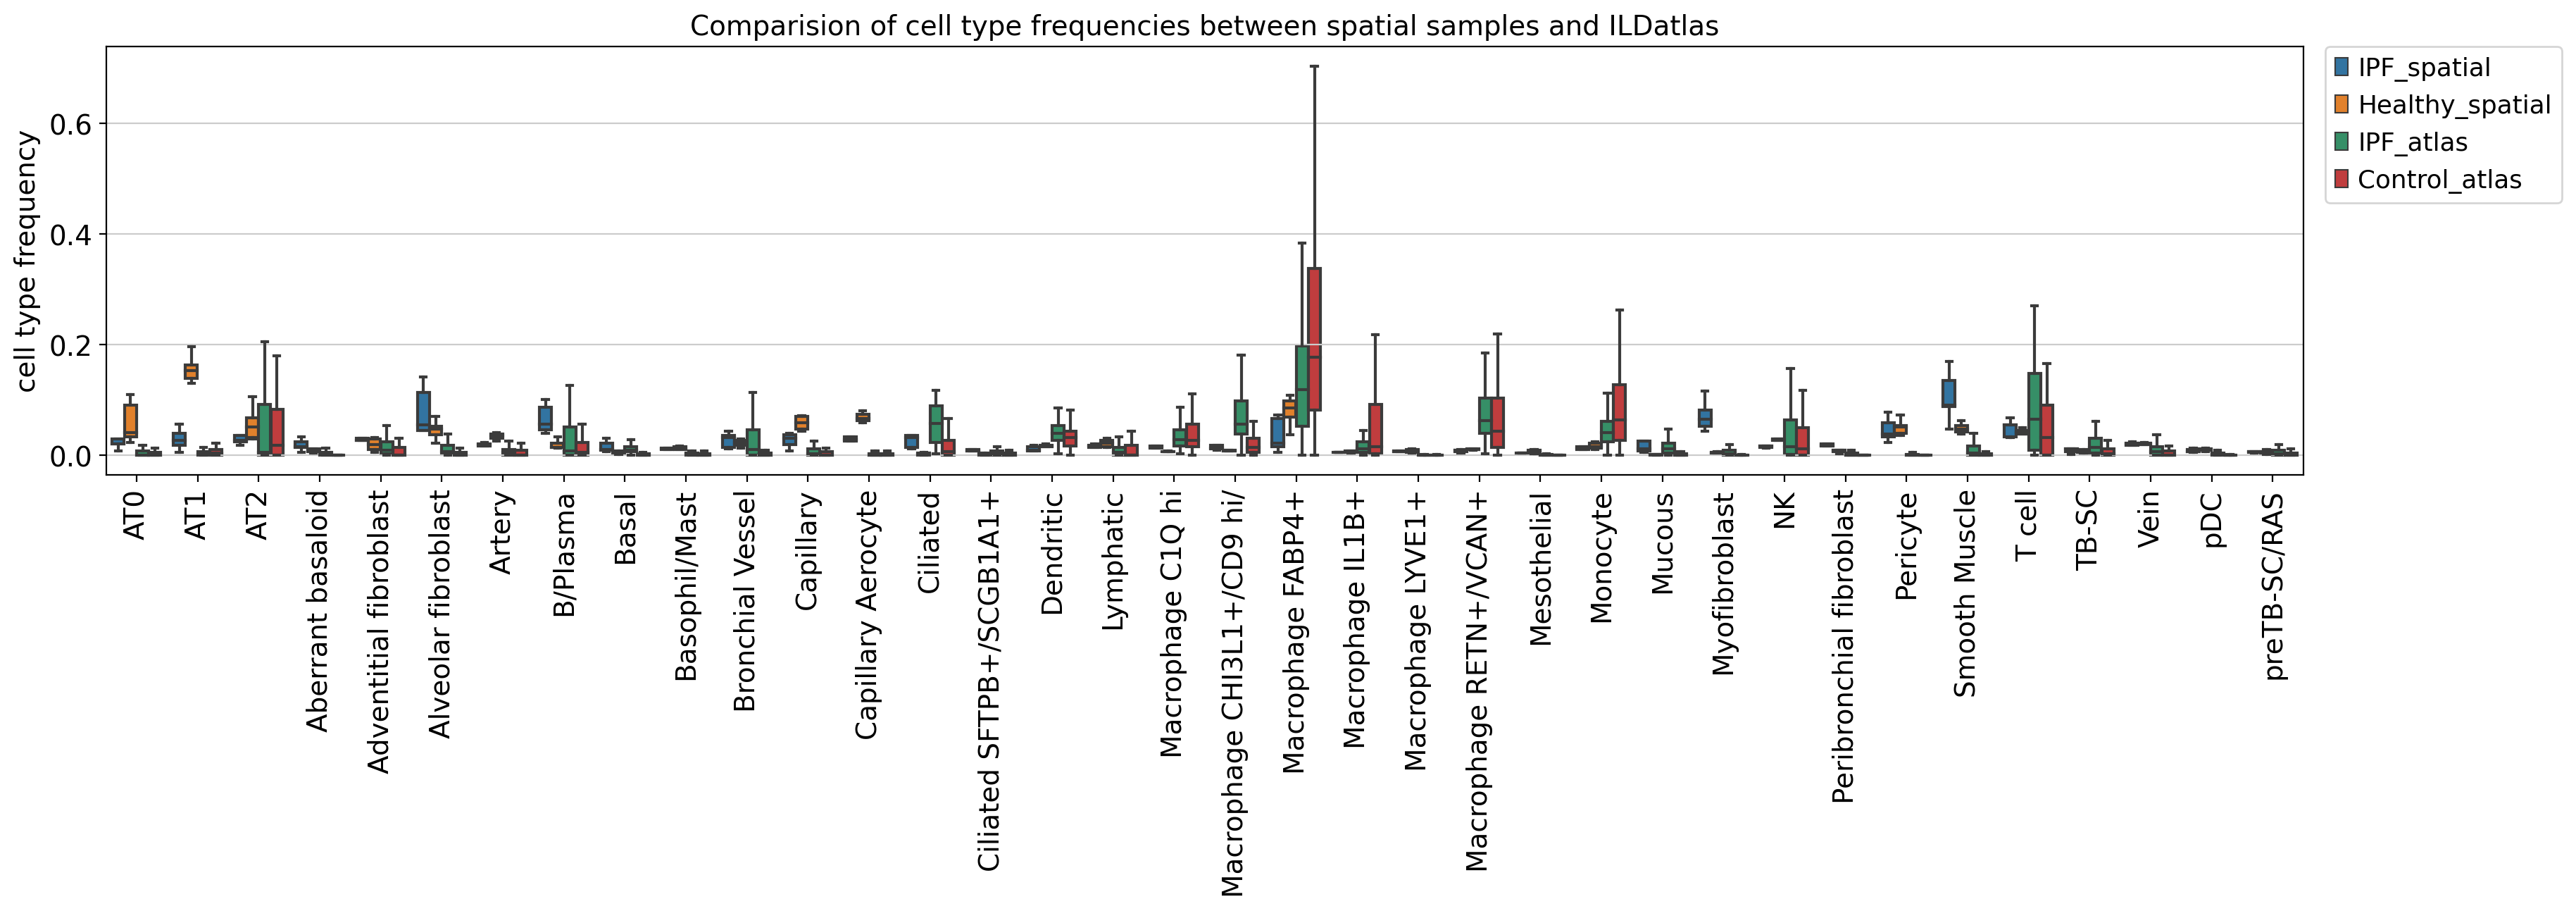

In [113]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 4)
#order = ["Alveolar_AT1",]# "Alveolar_AT2", "Alveolar_Macrophage", "Fibrotic",]

fig = sb.boxplot(data = tab_bleo, hue = "identifier", x = "cell_type", y = "value", order = None,showfliers=False) #hue_order = ["AT1", "AT2", "Macrophage FABP4+", "Myofibroblast","Macrophage"])
fig.legend(bbox_to_anchor= (1.01, 1), loc='upper left', borderaxespad=0)
plt.xlabel("")
#plt.ylim(0,0.4)
plt.ylabel("cell type frequency")
plt.title("Comparision of cell type frequencies between spatial samples and ILDatlas")
fig.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.savefig('./figures/Comparision_celltypefrequencies_atlas_spatial.pdf')
plt.show()

In [117]:
pairs2=[
    (("AT0", "Healthy_spatial"), ("AT0", "Control_atlas")),
    (("AT1", "Healthy_spatial"), ("AT1", "Control_atlas")),
    (("AT2", "Healthy_spatial"), ("AT2", "Control_atlas")),
    (("TB-SC", "Healthy_spatial"), ("TB-SC", "Control_atlas")),
    (('preTB-SC/RAS', "Healthy_spatial"), ('preTB-SC/RAS', "Control_atlas")),
    (("Mucous", "Healthy_spatial"), ("Mucous", "Control_atlas")),
    (("Basal", "Healthy_spatial"), ("Basal", "Control_atlas")),
    (("Ciliated", "Healthy_spatial"), ("Ciliated", "Control_atlas")),
    (('Ciliated SFTPB+/SCGB1A1+', "Healthy_spatial"), ('Ciliated SFTPB+/SCGB1A1+', "Control_atlas")),
    (('Alveolar fibroblast', "Healthy_spatial"), ('Alveolar fibroblast', "Control_atlas")),
    (("Peribronchial fibroblast", "Healthy_spatial"), ("Peribronchial fibroblast", "Control_atlas")),
    (('Pericyte', "Healthy_spatial"), ('Pericyte', "Control_atlas")),
    (("Smooth Muscle", "Healthy_spatial"), ("Smooth Muscle", "Control_atlas")),
    (("Mesothelial", "Healthy_spatial"), ("Mesothelial", "Control_atlas")),
    (("Adventitial fibroblast", "Healthy_spatial"), ("Adventitial fibroblast", "Control_atlas")),
    (("Artery", "Healthy_spatial"), ("Artery", "Control_atlas")),
    (("Bronchial Vessel", "Healthy_spatial"), ("Bronchial Vessel", "Control_atlas")),
    (("Capillary", "Healthy_spatial"), ("Capillary", "Control_atlas")),
    (('Capillary Aerocyte', "Healthy_spatial"), ('Capillary Aerocyte', "Control_atlas")),
    (("Lymphatic", "Healthy_spatial"), ("Lymphatic", "Control_atlas")),
    (("Vein", "Healthy_spatial"), ("Vein", "Control_atlas")),
        (('Macrophage FABP4+', "Healthy_spatial"), ('Macrophage FABP4+', "Control_atlas")),
        (('Macrophage C1Q hi', "Healthy_spatial"), ('Macrophage C1Q hi', "Control_atlas")),
        (('Macrophage CHI3L1+/CD9 hi/', "Healthy_spatial"), ('Macrophage CHI3L1+/CD9 hi/', "Control_atlas")),
        (('Macrophage IL1B+', "Healthy_spatial"), ('Macrophage IL1B+', "Control_atlas")),
        (('Macrophage LYVE1+', "Healthy_spatial"), ('Macrophage LYVE1+', "Control_atlas")),
         (('Macrophage RETN+/VCAN+', "Healthy_spatial"), ('Macrophage RETN+/VCAN+', "Control_atlas")),
    (("Monocyte", "Healthy_spatial"), ("Monocyte", "Control_atlas")),
    (("Dendritic", "Healthy_spatial"), ("Dendritic", "Control_atlas")),
    (('B/Plasma', "Healthy_spatial"), ('B/Plasma', "Control_atlas")),
    (("Basophil/Mast", "Healthy_spatial"), ("Basophil/Mast", "Control_atlas")),
    (("NK", "Healthy_spatial"), ("NK", "Control_atlas")),
    (("T cell", "Healthy_spatial"), ("T cell", "Control_atlas")),
    (("pDC", "Healthy_spatial"), ("pDC", "Control_atlas")),
    (('Aberrant basaloid', "Healthy_spatial"), ('Aberrant basaloid', "Control_atlas")),
    (("Myofibroblast", "Healthy_spatial"), ("Myofibroblast", "Control_atlas")),

    (("AT0", "IPF_spatial"), ("AT0", "IPF_atlas")),
    (("AT1", "IPF_spatial"), ("AT1", "IPF_atlas")),
    (("AT2", "IPF_spatial"), ("AT2", "IPF_atlas")),
    (("TB-SC", "IPF_spatial"), ("TB-SC", "IPF_atlas")),
    (('preTB-SC/RAS', "IPF_spatial"), ('preTB-SC/RAS', "IPF_atlas")),
    (("Mucous", "IPF_spatial"), ("Mucous", "IPF_atlas")),
    (("Basal", "IPF_spatial"), ("Basal", "IPF_atlas")),
    (("Ciliated", "IPF_spatial"), ("Ciliated", "IPF_atlas")),
    (('Ciliated SFTPB+/SCGB1A1+', "IPF_spatial"), ('Ciliated SFTPB+/SCGB1A1+', "IPF_atlas")),
    (('Alveolar fibroblast', "IPF_spatial"), ('Alveolar fibroblast', "IPF_atlas")),
    (("Peribronchial fibroblast", "IPF_spatial"), ("Peribronchial fibroblast", "IPF_atlas")),
    (('Pericyte', "IPF_spatial"), ('Pericyte', "IPF_atlas")),
    (("Smooth Muscle", "IPF_spatial"), ("Smooth Muscle", "IPF_atlas")),
    (("Mesothelial", "IPF_spatial"), ("Mesothelial", "IPF_atlas")),
    (("Adventitial fibroblast", "IPF_spatial"), ("Adventitial fibroblast", "IPF_atlas")),
    (("Artery", "IPF_spatial"), ("Artery", "IPF_atlas")),
    (("Bronchial Vessel", "IPF_spatial"), ("Bronchial Vessel", "IPF_atlas")),
    (("Capillary", "IPF_spatial"), ("Capillary", "IPF_atlas")),
    (('Capillary Aerocyte', "IPF_spatial"), ('Capillary Aerocyte', "IPF_atlas")),
    (("Lymphatic", "IPF_spatial"), ("Lymphatic", "IPF_atlas")),
    (("Vein", "IPF_spatial"), ("Vein", "IPF_atlas")),
    (("Monocyte", "IPF_spatial"), ("Monocyte", "IPF_atlas")),
    (("Dendritic", "IPF_spatial"), ("Dendritic", "IPF_atlas")),
    (('B/Plasma', "IPF_spatial"), ('B/Plasma', "IPF_atlas")),
    (("Basophil/Mast", "IPF_spatial"), ("Basophil/Mast", "IPF_atlas")),
    (("NK", "IPF_spatial"), ("NK", "IPF_atlas")),
    (("T cell", "IPF_spatial"), ("T cell", "IPF_atlas")),
    (("pDC", "IPF_spatial"), ("pDC", "IPF_atlas")),
    (('Aberrant basaloid', "IPF_spatial"), ('Aberrant basaloid', "IPF_atlas")),
    (("Myofibroblast", "IPF_spatial"), ("Myofibroblast", "IPF_atlas")),
        (('Macrophage FABP4+', "IPF_spatial"), ('Macrophage FABP4+', "IPF_atlas")),
        (('Macrophage C1Q hi', "IPF_spatial"), ('Macrophage C1Q hi', "IPF_atlas")),
        (('Macrophage CHI3L1+/CD9 hi/', "IPF_spatial"), ('Macrophage CHI3L1+/CD9 hi/', "IPF_atlas")),
        (('Macrophage IL1B+', "IPF_spatial"), ('Macrophage IL1B+', "IPF_atlas")),
        (('Macrophage LYVE1+', "IPF_spatial"), ('Macrophage LYVE1+', "IPF_atlas")),
         (('Macrophage RETN+/VCAN+', "IPF_spatial"), ('Macrophage RETN+/VCAN+', "IPF_atlas")),]

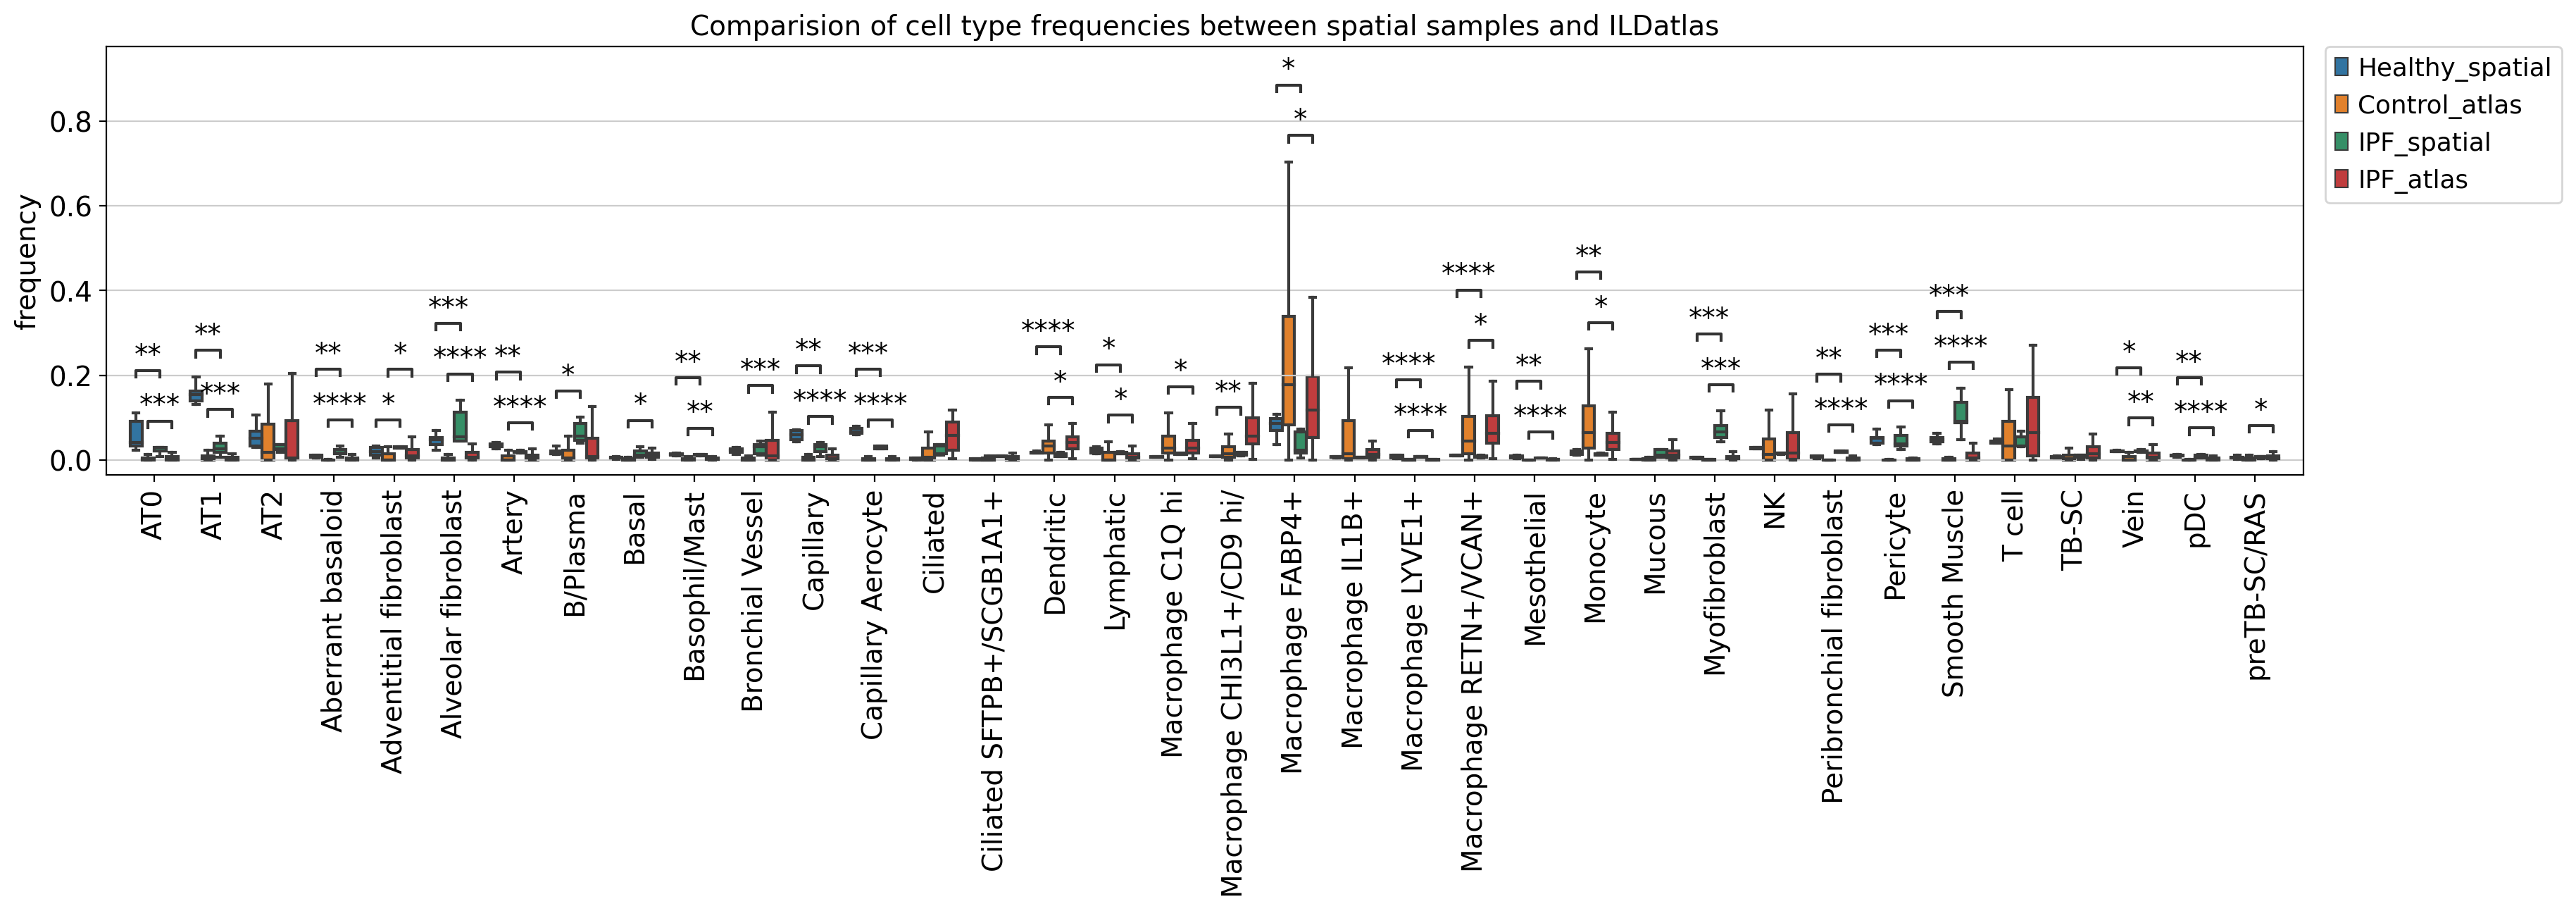

In [118]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 4)
#order = ["Alveolar_AT1",]# "Alveolar_AT2", "Alveolar_Macrophage", "Fibrotic",]

fig = sb.boxplot(data = tab_bleo, hue = "identifier", x = "cell_type", y = "value", hue_order = ["Healthy_spatial","Control_atlas","IPF_spatial","IPF_atlas"],showfliers=False) #hue_order = ["AT1", "AT2", "Macrophage FABP4+", "Myofibroblast","Macrophage"])
fig.legend(bbox_to_anchor= (1.01, 1), loc='upper left', borderaxespad=0)
plt.xlabel("")
plt.ylabel("frequency")
plt.title("Comparision of cell type frequencies between spatial samples and ILDatlas")
fig.set_xticklabels(ax.get_xticklabels(),rotation=90)
annot = Annotator(fig, pairs2, data = tab_bleo,hue = "identifier", x = "cell_type", y = "value", hide_non_significant=True)
annot.configure(test='Mann-Whitney', verbose=0)
annot.apply_test()
annot.annotate()
plt.savefig('./figures/Comparision_celltypefrequencies_atlas_spatial_sig.pdf')
plt.show()